In [1]:
!pip install ptitprince

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 6.1 MB/s eta 0:00:00:00:01
  Created wheel for ptitprince: filename=ptitprince-0.2.7-py3-none-any.whl size=10655 sha256=52fea5991f60a195c74ae8840b7e181bd34971052aa2b2dcbf914699c2360ffd
  Stored in directory: /root/.cache/pip/wheels/0e/43/31/e76a3bf61865543f076a9d9eb027a740caefb379424ecba4e8
Successfully built ptitprince
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.6.4 requires numpy<1.26,>=1.16.0, but you have numpy 1.26.4 which is incompatible.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ptitprince

# Machine Learning
## Feature Scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## ML Models Diffrent Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

## Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Comparision of Performance of all Algorithms
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [6]:
df = pd.read_csv('telecom_churn.csv')
df

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
0         0           128                1         1       2.70   
1         0           107                1         1       3.70   
2         0           137                1         0       0.00   
3         0            84                0         0       0.00   
4         0            75                0         0       0.00   
...     ...           ...              ...       ...        ...   
3328      0           192                1         1       2.67   
3329      0            68                1         0       0.34   
3330      0            28                1         0       0.00   
3331      0           184                0         0       0.00   
3332      0            74                1         1       3.70   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0                 1    265.1       110           89.0        9.87      10.0  
1                 1    161.6       123           82.0        9.78      13.7  
2                 0    243.4       114           52.0        6.06      12.2  
3                 2    299.4        71           57.0        3.10       6.6  
4                 3    166.7       113           41.0        7.42      10.1  
...             ...      ...       ...            ...         ...       ...  
3328              2    156.2        77           71.7       10.78       9.9  
3329              3    231.1        57           56.4        7.67       9.6  
3330              2    180.8       109           56.0       14.44      14.1  
3331              2    213.8       105           50.0        7.98       5.0  
3332              0    234.4       113          100.0       13.30      13.7  

[3333 rows x 11 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [8]:
df.describe()

Churn  AccountWeeks  ContractRenewal     DataPlan    DataUsage  \
count  3333.000000   3333.000000      3333.000000  3333.000000  3333.000000   
mean      0.144914    101.064806         0.903090     0.276628     0.816475   
std       0.352067     39.822106         0.295879     0.447398     1.272668   
min       0.000000      1.000000         0.000000     0.000000     0.000000   
25%       0.000000     74.000000         1.000000     0.000000     0.000000   
50%       0.000000    101.000000         1.000000     0.000000     0.000000   
75%       0.000000    127.000000         1.000000     1.000000     1.780000   
max       1.000000    243.000000         1.000000     1.000000     5.400000   

       CustServCalls      DayMins     DayCalls  MonthlyCharge   OverageFee  \
count    3333.000000  3333.000000  3333.000000    3333.000000  3333.000000   
mean        1.562856   179.775098   100.435644      56.305161    10.051488   
std         1.315491    54.467389    20.069084      16.426032     2.535712   
min         0.000000     0.000000     0.000000      14.000000     0.000000   
25%         1.000000   143.700000    87.000000      45.000000     8.330000   
50%         1.000000   179.400000   101.000000      53.500000    10.070000   
75%         2.000000   216.400000   114.000000      66.200000    11.770000   
max         9.000000   350.800000   165.000000     111.300000    18.190000   

          RoamMins  
count  3333.000000  
mean     10.237294  
std       2.791840  
min       0.000000  
25%       8.500000  
50%      10.300000  
75%      12.100000  
max      20.000000

array([[<Axes: title={'center': 'Churn'}>,
        <Axes: title={'center': 'AccountWeeks'}>,
        <Axes: title={'center': 'ContractRenewal'}>],
       [<Axes: title={'center': 'DataPlan'}>,
        <Axes: title={'center': 'DataUsage'}>,
        <Axes: title={'center': 'CustServCalls'}>],
       [<Axes: title={'center': 'DayMins'}>,
        <Axes: title={'center': 'DayCalls'}>,
        <Axes: title={'center': 'MonthlyCharge'}>],
       [<Axes: title={'center': 'OverageFee'}>,
        <Axes: title={'center': 'RoamMins'}>, <Axes: >]], dtype=object)

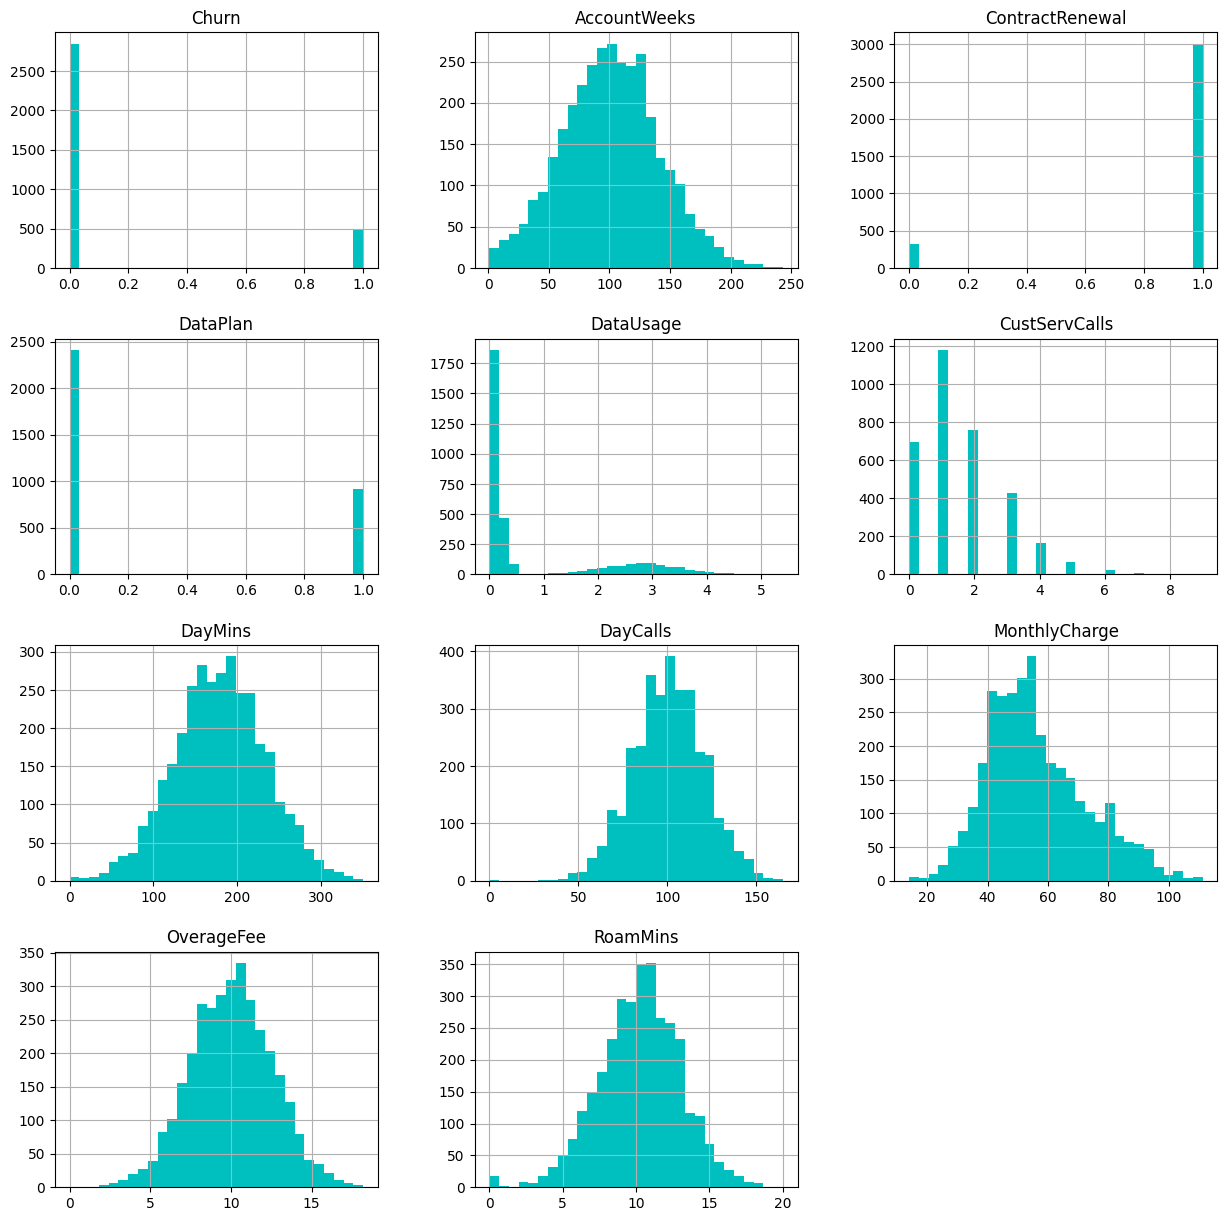

In [9]:
df.hist(figsize=(15,15), bins=30, color='c')

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:991: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:991: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:991: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:991: FutureWarning: When 

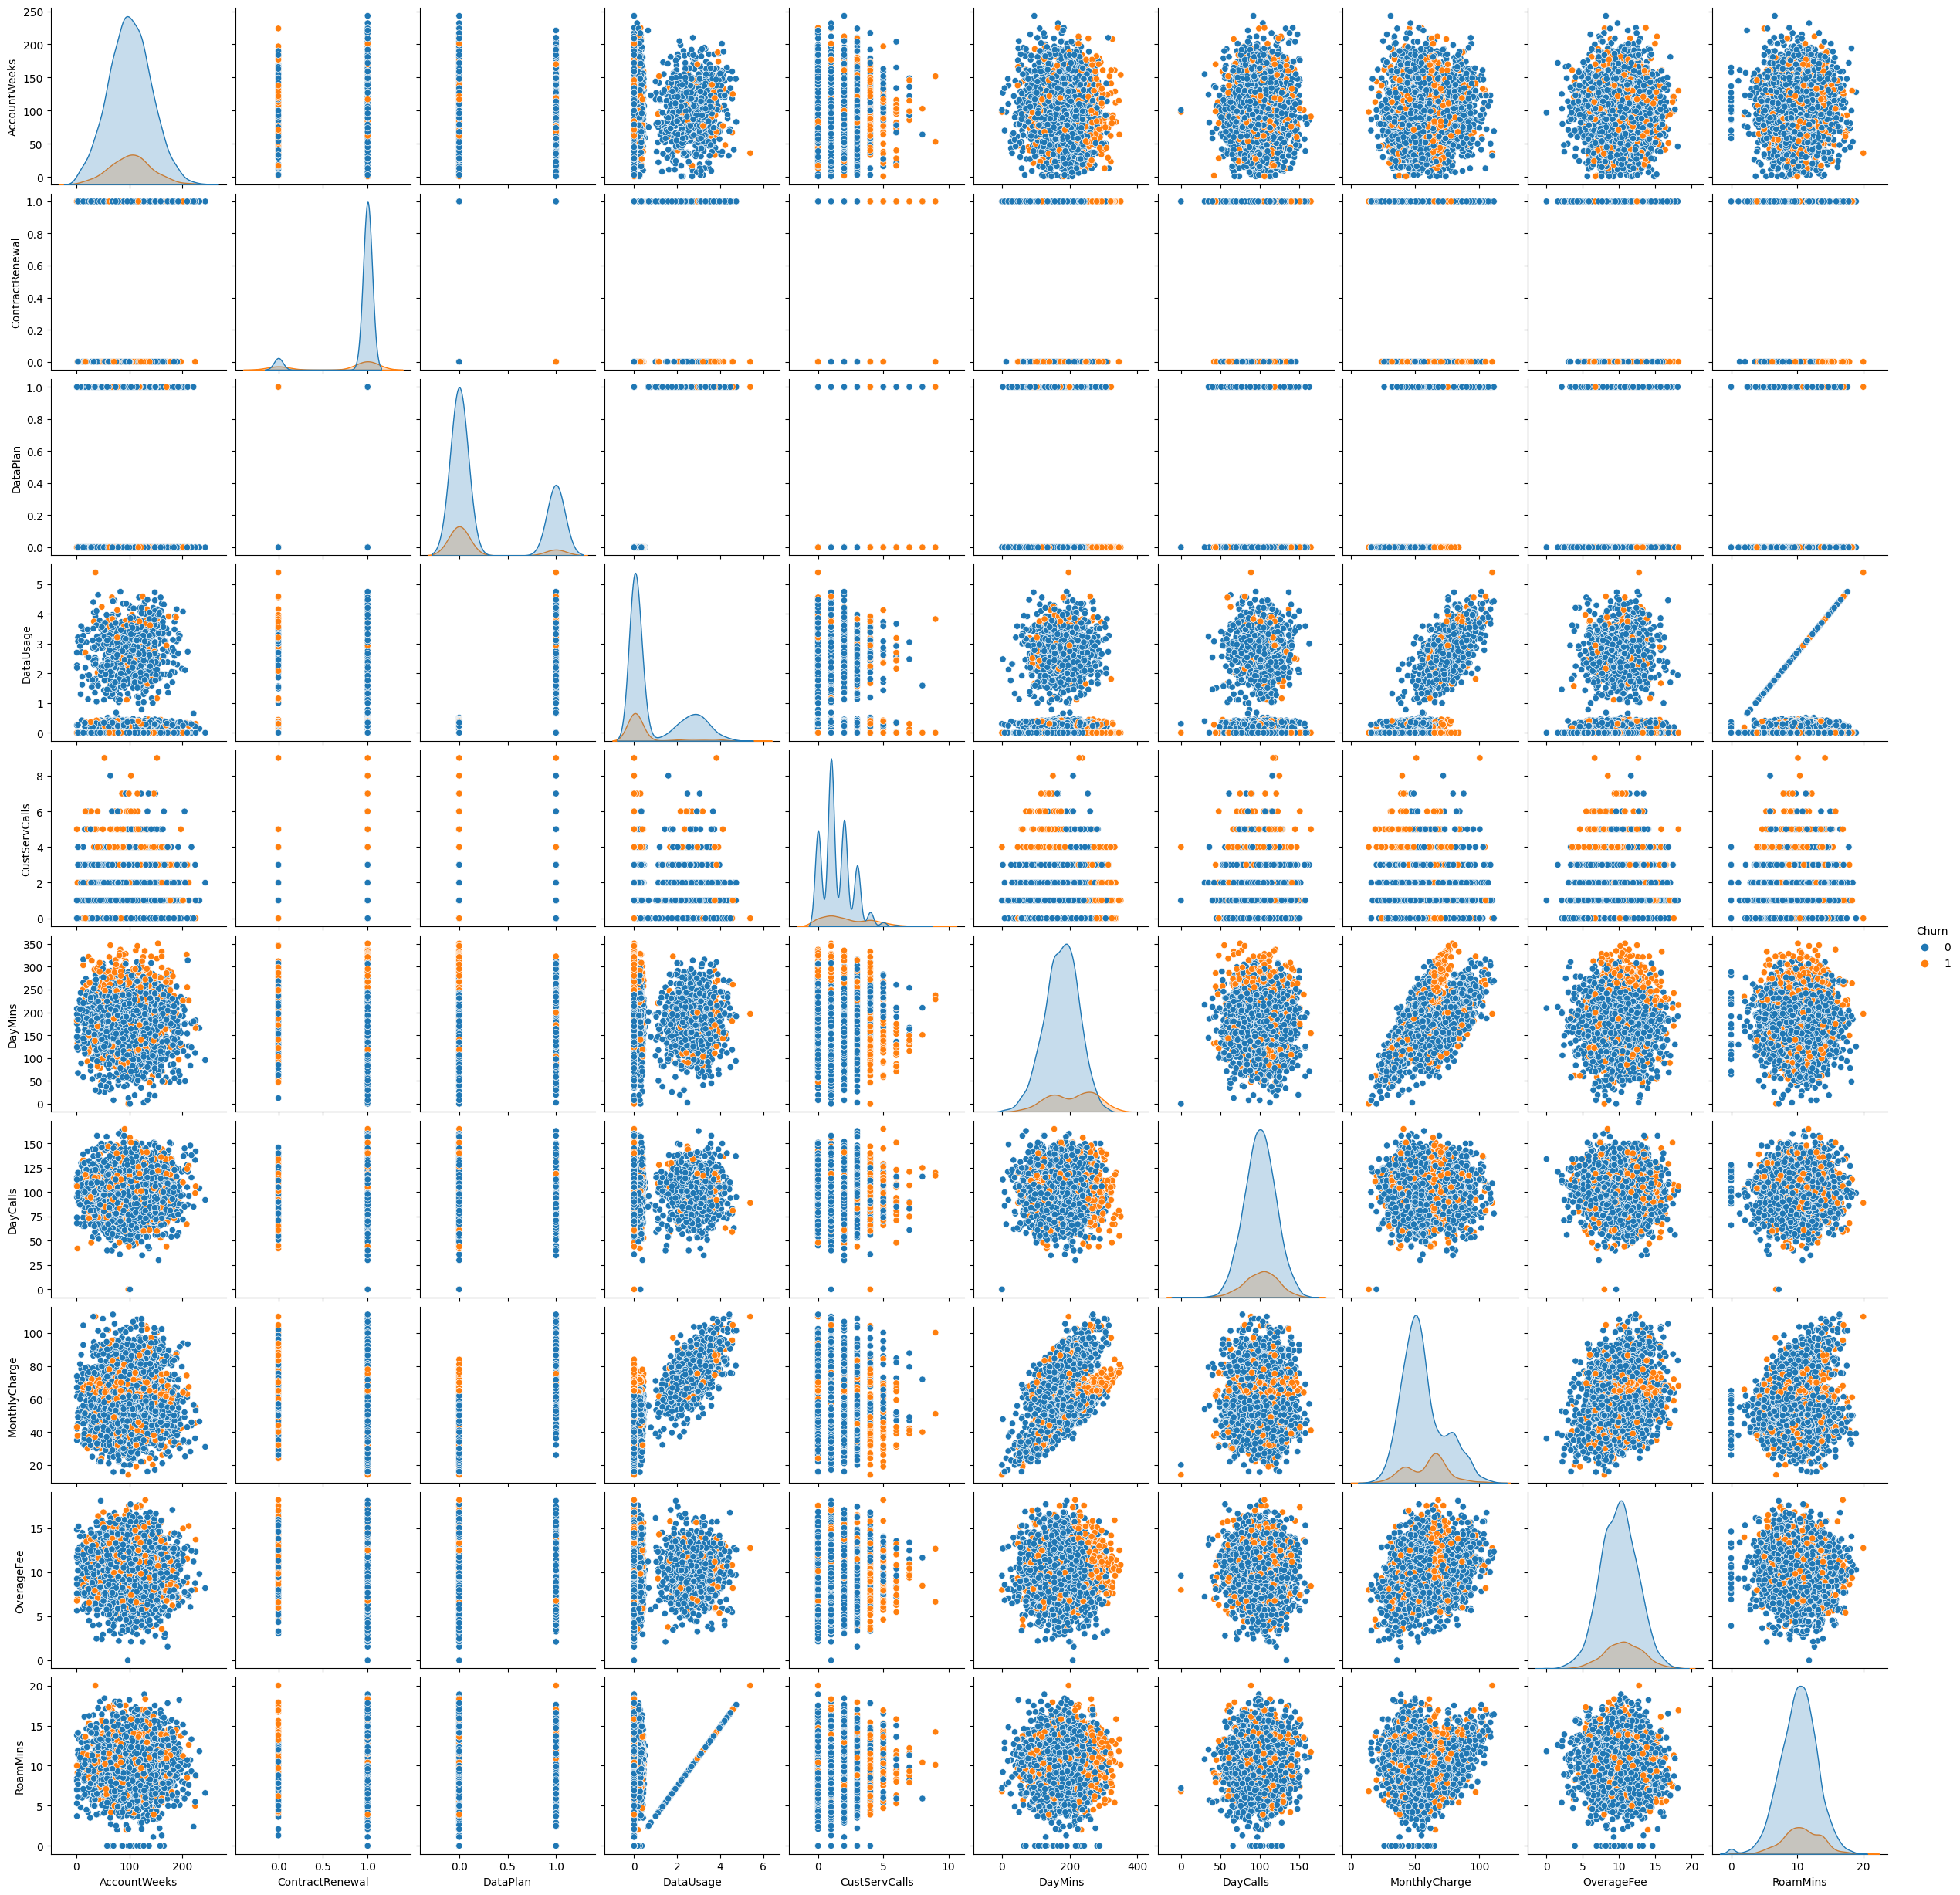

In [10]:
sns.pairplot(df, hue="Churn")

<Axes: title={'center': 'All Over Churned Ratio'}, ylabel='count'>

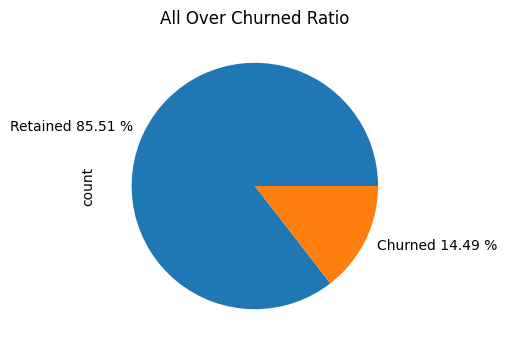

In [11]:
df["Churn"].value_counts().plot(kind="pie", title="All Over Churned Ratio",
                                labels = ["Retained {:.2f} %".format(len(df.loc[df.Churn==0])*100/len(df.Churn)),
                                          "Churned {:.2f} %".format(len(df.loc[df.Churn==1])*100/len(df.Churn))],
                                figsize=(4,4))

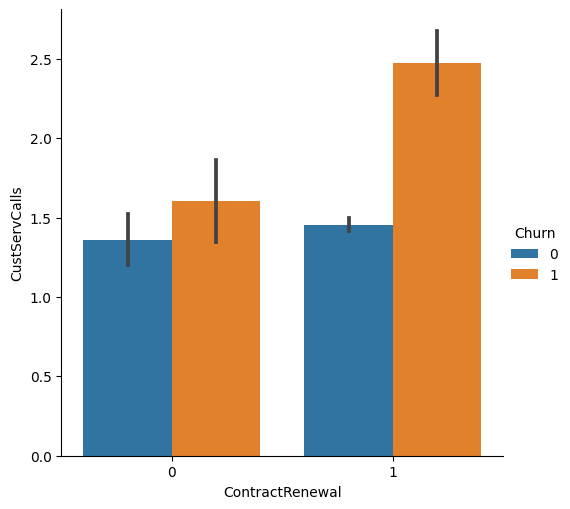

In [12]:
sns.catplot(x="ContractRenewal", y="CustServCalls", hue="Churn", kind="bar", data=df)

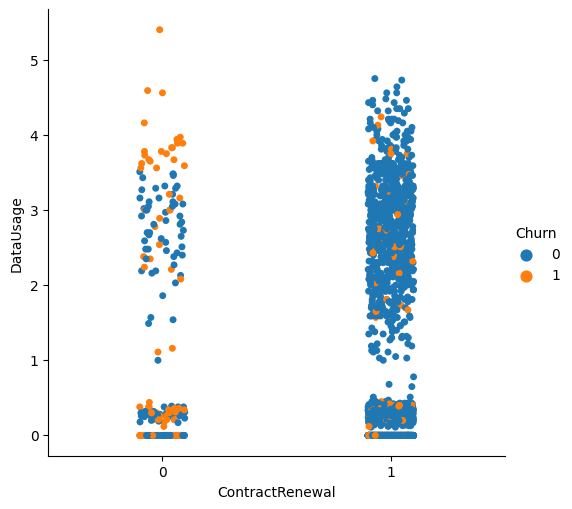

In [13]:
sns.catplot(x="ContractRenewal", y="DataUsage", hue="Churn", data=df)

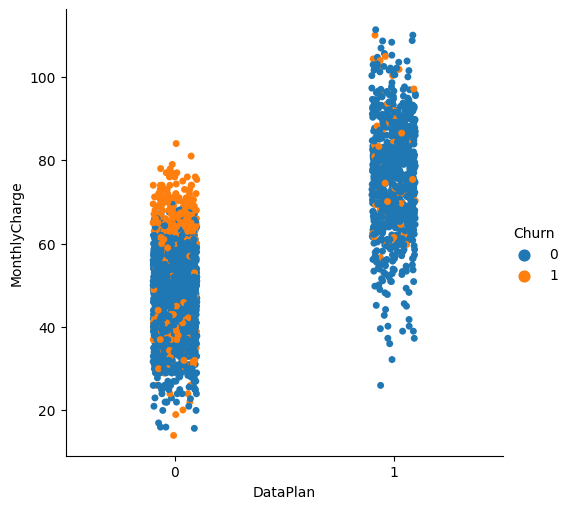

In [14]:
sns.catplot(x="DataPlan", y="MonthlyCharge", hue="Churn", data=df)

In [15]:
df1 = df.loc[df["Churn"]==1] # Churned Customers
df0 = df.loc[df["Churn"]==0] # Existing Customers

Text(0.5, 1.0, 'Churn=0&1')

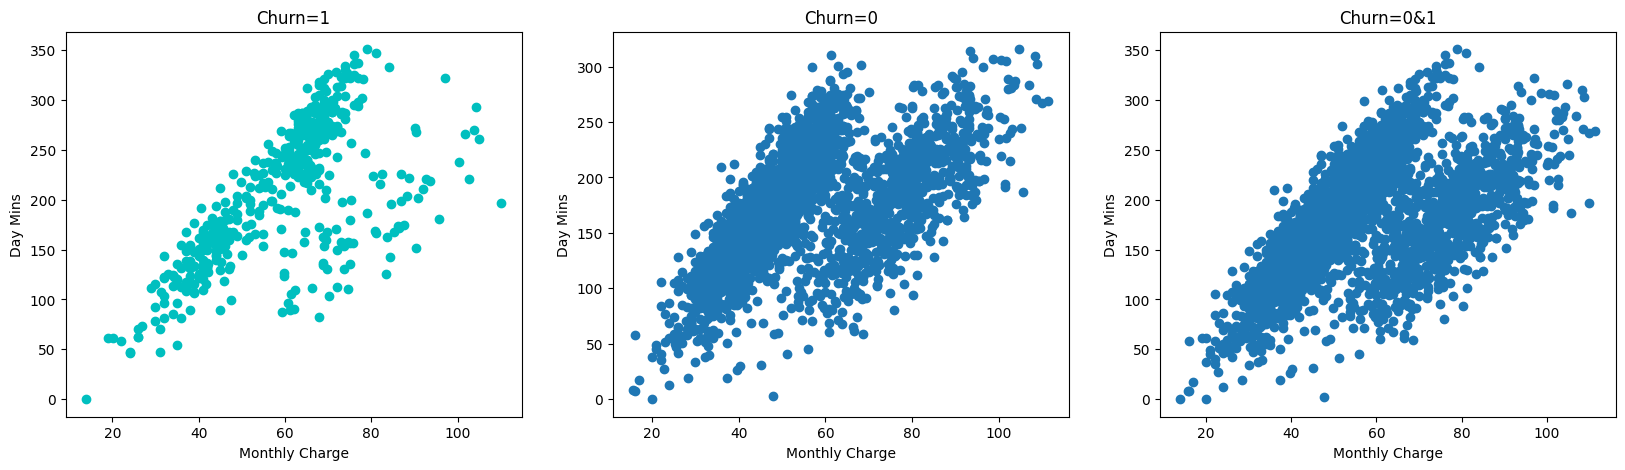

In [16]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(df1["MonthlyCharge"], df1["DayMins"], "co")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(df0["MonthlyCharge"], df0["DayMins"], "o")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(df["MonthlyCharge"], df["DayMins"], "o")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=0&1")

Text(0.5, 1.0, 'Churn=0&1')

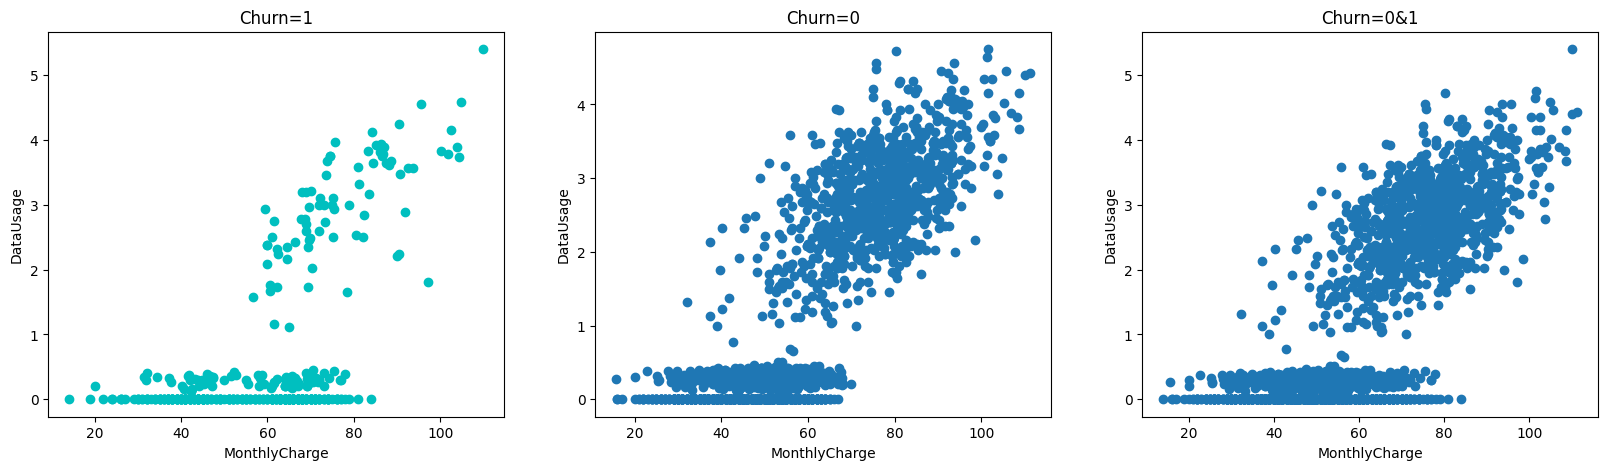

In [17]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(df1["MonthlyCharge"], df1["DataUsage"], "co")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(df0["MonthlyCharge"], df0["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(df["MonthlyCharge"], df["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0&1")

In [18]:
# Manual Customer Segmentaion
seg1 = df.loc[df["DataUsage"]<=1] # Segment1
seg2 = df.loc[df["DataUsage"]>1] # Segment2

seg11 = seg1.loc[seg1["Churn"]==1] # Churn Customers from Segment1
seg10 = seg1.loc[seg1["Churn"]==0] # Existing Custoemrs from Segment1

seg21 = seg2.loc[seg2["Churn"]==1] # Churned Custoemrs in segment2.
seg20 = seg2.loc[seg2["Churn"]==0] # Existing Custoemrs in segment2.

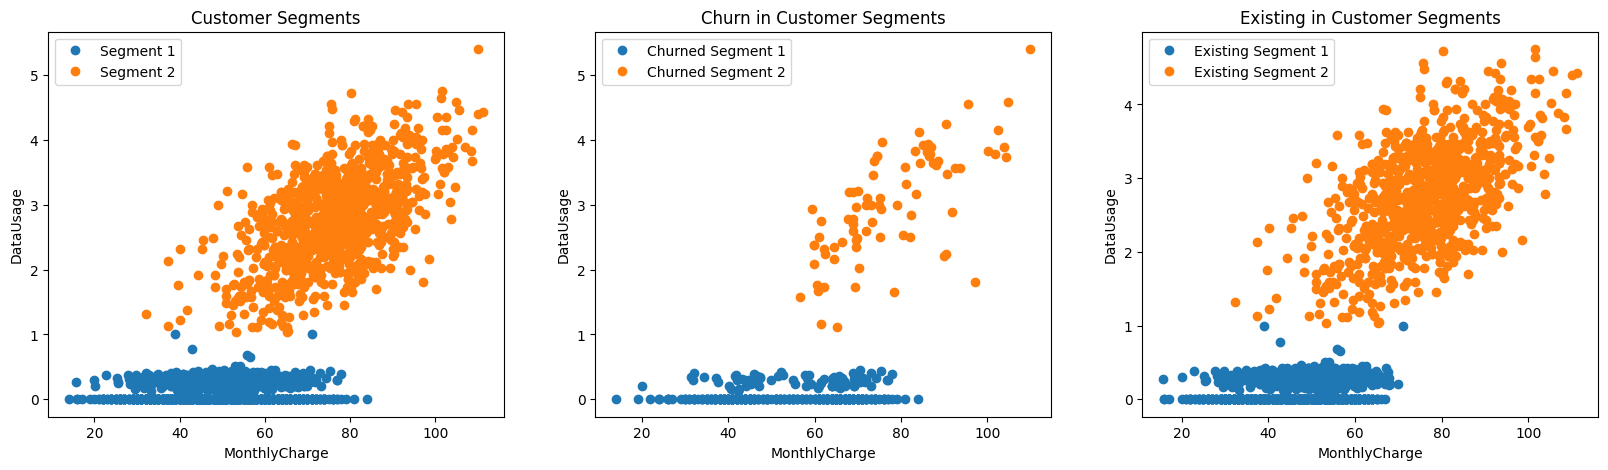

In [19]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(seg1['MonthlyCharge'], seg1['DataUsage'], 'o', label='Segment 1')
plt.plot(seg2['MonthlyCharge'], seg2['DataUsage'], 'o', label='Segment 2')
plt.title('Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DataUsage")
plt.legend()

plt.subplot(132)
plt.plot(seg11['MonthlyCharge'], seg11['DataUsage'], 'o', label='Churned Segment 1')
plt.plot(seg21['MonthlyCharge'], seg21['DataUsage'], 'o', label='Churned Segment 2')
plt.title('Churn in Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DataUsage")
plt.legend()

plt.subplot(133)
plt.plot(seg10['MonthlyCharge'], seg10['DataUsage'], 'o', label='Existing Segment 1')
plt.plot(seg20['MonthlyCharge'], seg20['DataUsage'], 'o', label='Existing Segment 2')
plt.title('Existing in Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DataUsage")
plt.legend()

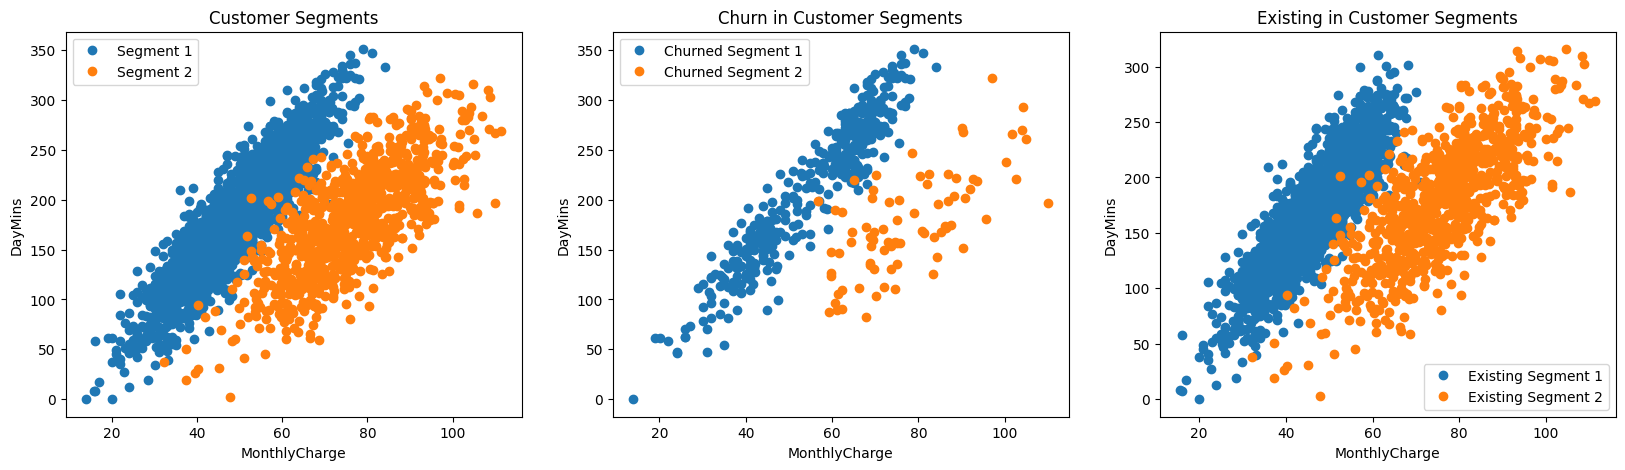

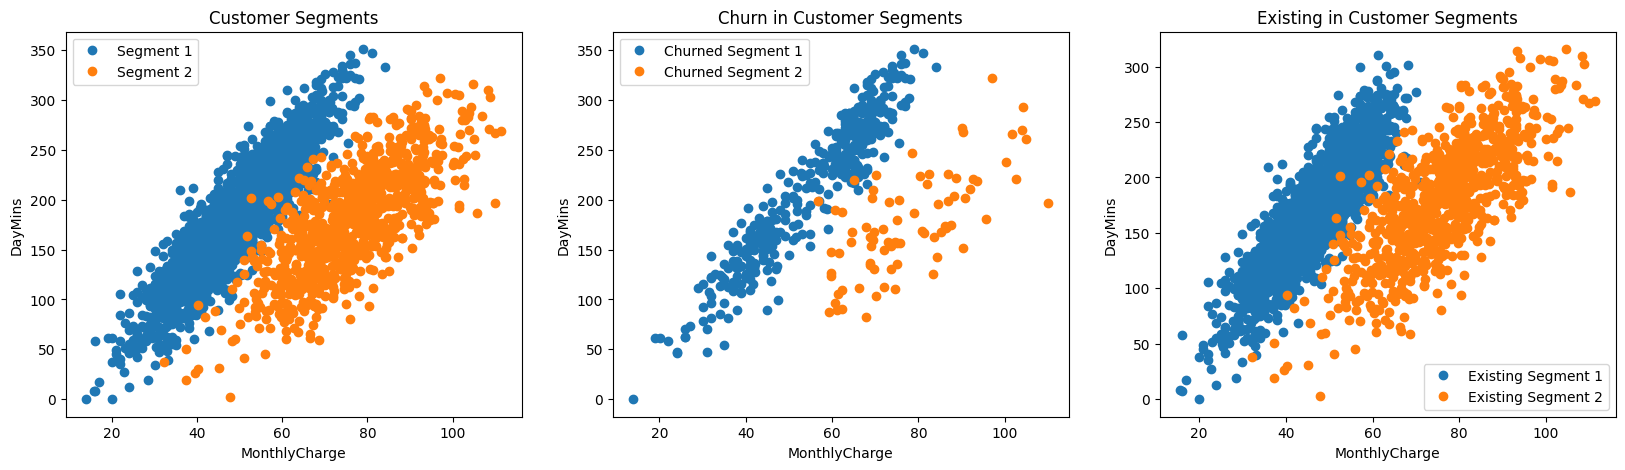

In [20]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(seg1['MonthlyCharge'], seg1['DayMins'], 'o', label='Segment 1')
plt.plot(seg2['MonthlyCharge'], seg2['DayMins'], 'o', label='Segment 2')
plt.title('Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DayMins")
plt.legend()

plt.subplot(132)
plt.plot(seg11['MonthlyCharge'], seg11['DayMins'], 'o', label='Churned Segment 1')
plt.plot(seg21['MonthlyCharge'], seg21['DayMins'], 'o', label='Churned Segment 2')
plt.title('Churn in Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DayMins")
plt.legend()

plt.subplot(133)
plt.plot(seg10['MonthlyCharge'], seg10['DayMins'], 'o', label='Existing Segment 1')
plt.plot(seg20['MonthlyCharge'], seg20['DayMins'], 'o', label='Existing Segment 2')
plt.title('Existing in Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DayMins")
plt.legend()

In [21]:
seg1

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
2         0           137                1         0       0.00   
3         0            84                0         0       0.00   
4         0            75                0         0       0.00   
5         0           118                0         0       0.00   
7         0           147                0         0       0.00   
...     ...           ...              ...       ...        ...   
3326      0            96                1         0       0.36   
3327      0            79                1         0       0.00   
3329      0            68                1         0       0.34   
3330      0            28                1         0       0.00   
3331      0           184                0         0       0.00   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
2                 0    243.4       114           52.0        6.06      12.2  
3                 2    299.4        71           57.0        3.10       6.6  
4                 3    166.7       113           41.0        7.42      10.1  
5                 0    223.4        98           57.0       11.03       6.3  
7                 0    157.0        79           36.0        5.16       7.1  
...             ...      ...       ...            ...         ...       ...  
3326              1    106.6       128           46.6       14.24      14.9  
3327              2    134.7        98           40.0        9.49      11.8  
3329              3    231.1        57           56.4        7.67       9.6  
3330              2    180.8       109           56.0       14.44      14.1  
3331              2    213.8       105           50.0        7.98       5.0  

[2420 rows x 11 columns]

In [22]:
seg1["Churn"].value_counts(normalize=True) * 100

Churn
0    83.347107
1    16.652893
Name: proportion, dtype: float64

In [23]:
(seg1["DataPlan"].value_counts(normalize=True) * 100)

DataPlan
0    99.628099
1     0.371901
Name: proportion, dtype: float64

In [24]:
seg1.loc[seg1["DataPlan"]==1]

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
343       0            98                1         1       0.00   
383       0           117                0         1       1.00   
595       0            87                1         1       0.00   
2906      0            87                1         1       0.00   
3022      0           123                1         1       0.78   
3212      0           144                1         1       1.00   
3216      0           221                1         1       0.65   
3234      0            75                1         1       0.68   
3275      0           120                1         1       0.00   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
343               2     64.6        98           26.0        8.81       0.0  
383               1    196.0        82           71.0       16.14       3.7  
595               1    151.4        95           39.0        7.62       0.0  
2906              1    165.8       122           45.0        9.35       0.0  
3022              0    146.6        87           42.8        5.74       2.9  
3212              0    105.0        86           39.0        6.09       3.7  
3216              0    180.5        85           56.5       11.21       2.4  
3234              1    200.6        96           55.8        8.21       2.5  
3275              1    128.5       115           36.0        8.19       0.0

Text(0.5, 1.0, 'Churn=0&1')

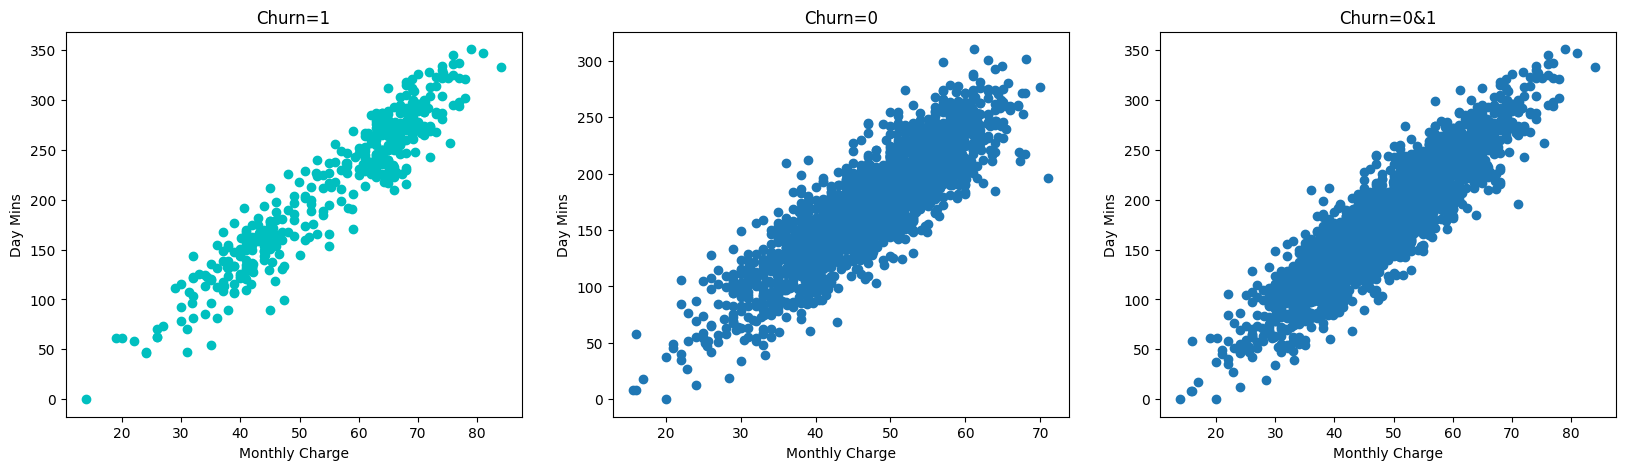

In [25]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(seg11["MonthlyCharge"], seg11["DayMins"], "co")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(seg10["MonthlyCharge"], seg10["DayMins"], "o")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(seg1["MonthlyCharge"], seg1["DayMins"], "o")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=0&1")

Text(0.5, 1.0, 'Churn=0&1')

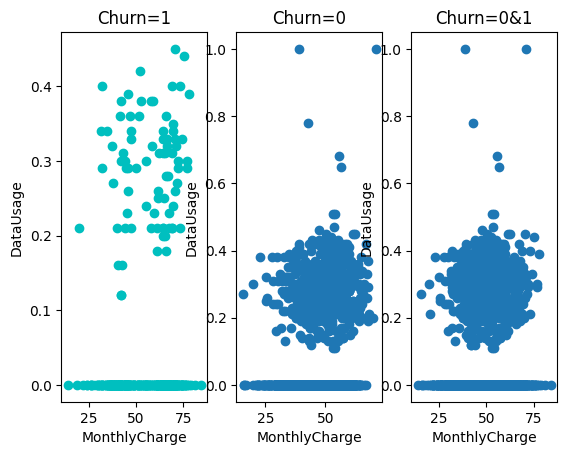

In [26]:
plt.subplot(131)
plt.plot(seg11["MonthlyCharge"], seg11["DataUsage"], "co")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(seg10["MonthlyCharge"], seg10["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(seg1["MonthlyCharge"], seg1["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0&1")

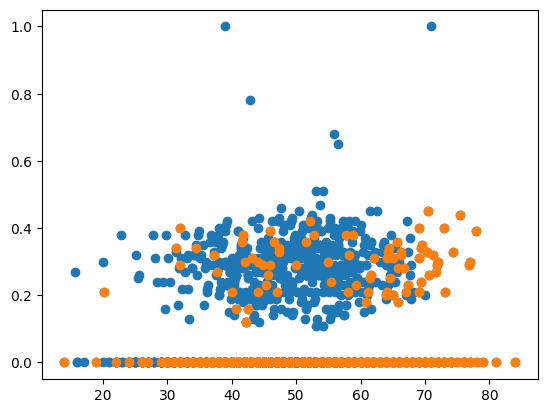

In [27]:
plt.plot(seg1["MonthlyCharge"], seg1["DataUsage"], "o") # All within seg1
plt.plot(seg11["MonthlyCharge"], seg11["DataUsage"], "o") # Churned within seg1

Text(0.5, 1.0, 'Churn=0&1')

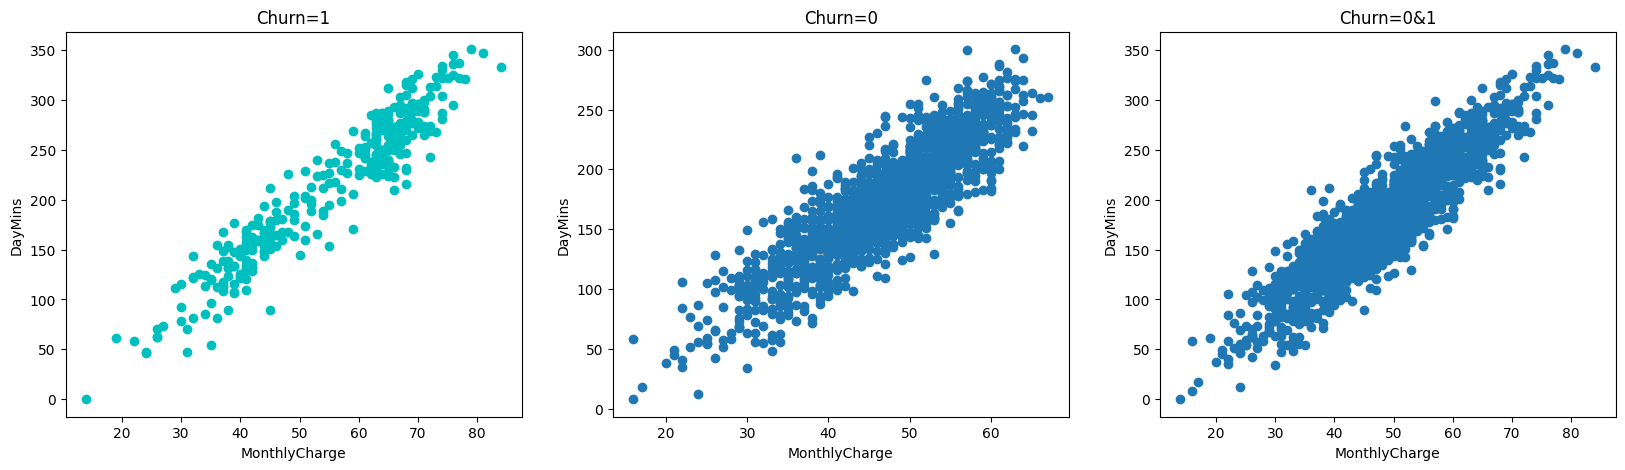

In [28]:
dataus0 = seg1.loc[seg1["DataUsage"]==0] # Customers with Data Usage zero in seg1.

dataus00 = dataus0.loc[dataus0["Churn"]==0] # Existing Customers with Data Usage zero in seg1.
dataus01 = dataus0.loc[dataus0["Churn"]==1] # Churned Customers with Data Usage zero in seg1.

plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(dataus01["MonthlyCharge"], dataus01["DayMins"], "co")
plt.xlabel("MonthlyCharge")
plt.ylabel("DayMins")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(dataus00["MonthlyCharge"], dataus00["DayMins"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DayMins")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(dataus0["MonthlyCharge"], dataus0["DayMins"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DayMins")
plt.title("Churn=0&1")

In [29]:
dataus0

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
2         0           137                1         0        0.0   
3         0            84                0         0        0.0   
4         0            75                0         0        0.0   
5         0           118                0         0        0.0   
7         0           147                0         0        0.0   
...     ...           ...              ...       ...        ...   
3322      1            62                1         0        0.0   
3324      0           159                1         0        0.0   
3327      0            79                1         0        0.0   
3330      0            28                1         0        0.0   
3331      0           184                0         0        0.0   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
2                 0    243.4       114           52.0        6.06      12.2  
3                 2    299.4        71           57.0        3.10       6.6  
4                 3    166.7       113           41.0        7.42      10.1  
5                 0    223.4        98           57.0       11.03       6.3  
7                 0    157.0        79           36.0        5.16       7.1  
...             ...      ...       ...            ...         ...       ...  
3322              4    321.1       105           78.0       13.28      11.5  
3324              1    169.8       114           46.0        9.89      11.6  
3327              2    134.7        98           40.0        9.49      11.8  
3330              2    180.8       109           56.0       14.44      14.1  
3331              2    213.8       105           50.0        7.98       5.0  

[1813 rows x 11 columns]

In [30]:
dataus0['Churn'].value_counts(normalize=True) * 100

Churn
0    82.239382
1    17.760618
Name: proportion, dtype: float64

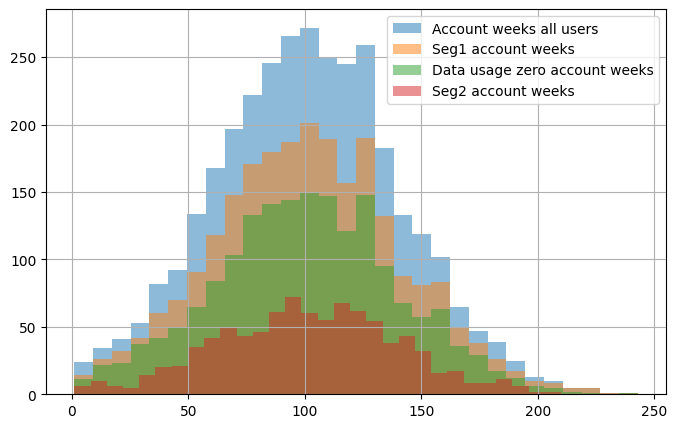

In [31]:
plt.figure(figsize=(8,5))
df["AccountWeeks"].hist(bins=30, alpha=0.5, label='Account weeks all users')
seg1["AccountWeeks"].hist(bins=30, alpha=0.5, label='Seg1 account weeks')
dataus0["AccountWeeks"].hist(bins=30, alpha=0.5, label='Data usage zero account weeks')
seg2["AccountWeeks"].hist(bins=30, alpha=0.5, label='Seg2 account weeks')
plt.legend()

In [32]:
dataus = seg1.loc[seg1["DataUsage"]>0]
dataus

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
8         0           117                1         0       0.19   
10        1            65                1         0       0.29   
11        0            74                1         0       0.34   
13        0            95                1         0       0.44   
20        0           147                1         0       0.31   
...     ...           ...              ...       ...        ...   
3320      1           122                0         0       0.30   
3323      1           117                1         0       0.39   
3325      0            78                1         0       0.23   
3326      0            96                1         0       0.36   
3329      0            68                1         0       0.34   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
8                 1    184.5        97           63.9       17.58       8.7  
10                4    129.1       137           44.9       11.43      12.7  
11                0    187.7       127           49.4        8.17       9.1  
13                3    156.6        88           52.4       12.38      12.3  
20                0    155.1       117           50.1       11.99      10.6  
...             ...      ...       ...            ...         ...       ...  
3320              4    140.0       101           44.0        9.82       9.7  
3323              5    118.4       126           45.9       12.47      13.6  
3325              2    193.4        99           45.3        5.85       9.3  
3326              1    106.6       128           46.6       14.24      14.9  
3329              3    231.1        57           56.4        7.67       9.6  

[607 rows x 11 columns]

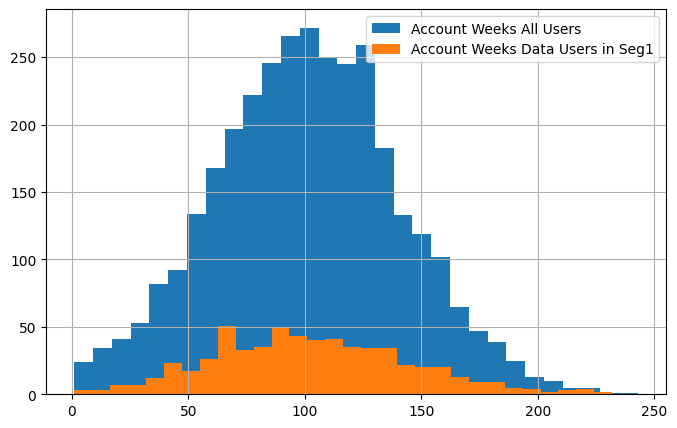

In [33]:
plt.figure(figsize=(8,5))
df["AccountWeeks"].hist(bins=30, label='Account Weeks All Users')
dataus["AccountWeeks"].hist(bins=30, label='Account Weeks Data Users in Seg1')
plt.legend()

In [34]:
dataus["Churn"].value_counts(normalize=True) * 100

Churn
0    86.655684
1    13.344316
Name: proportion, dtype: float64

In [35]:
seg2["Churn"].value_counts(normalize=True) * 100

Churn
0    91.237678
1     8.762322
Name: proportion, dtype: float64

In [36]:
seg2["DataPlan"].value_counts()

DataPlan
1    913
Name: count, dtype: int64

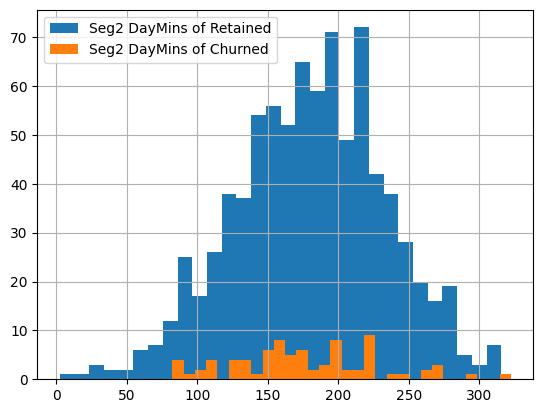

In [37]:
seg20["DayMins"].hist(bins=30, label='Seg2 DayMins of Retained') 
seg21["DayMins"].hist(bins=30, label='Seg2 DayMins of Churned') 
plt.legend()

Text(0.5, 1.0, 'Churn=0&1')

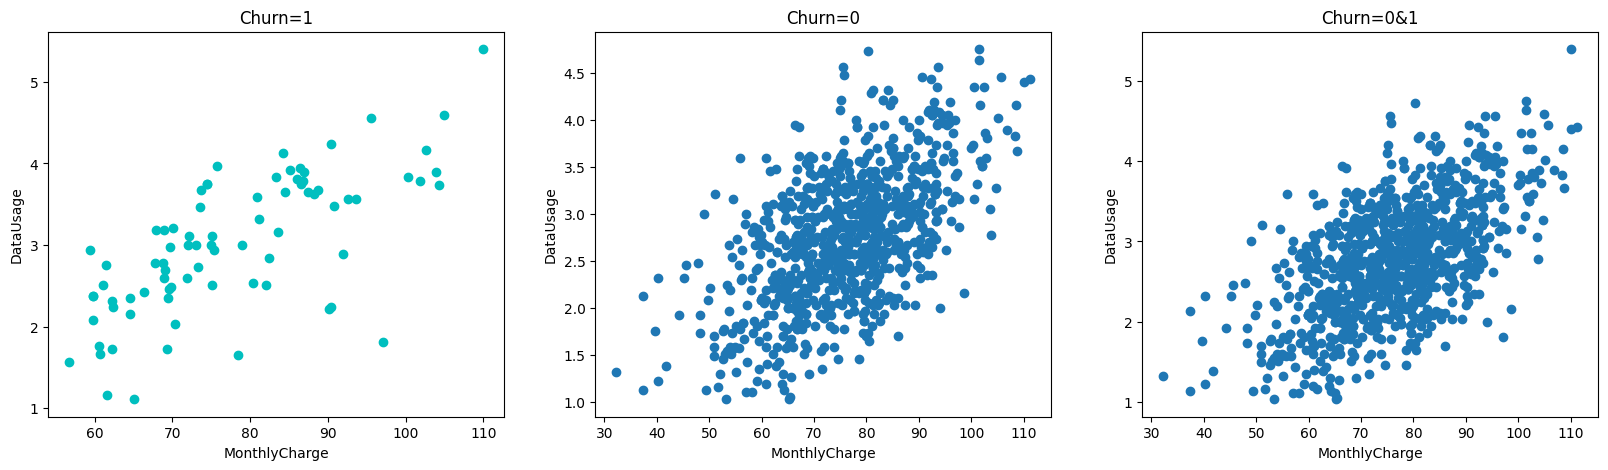

In [38]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(seg21["MonthlyCharge"], seg21["DataUsage"], "co")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(seg20["MonthlyCharge"], seg20["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(seg2["MonthlyCharge"], seg2["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0&1")

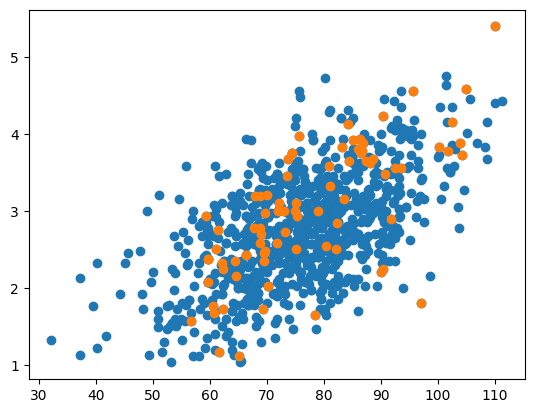

In [39]:
plt.plot(seg2["MonthlyCharge"], seg2["DataUsage"], "o")
plt.plot(seg21["MonthlyCharge"], seg21["DataUsage"], "o")

<Axes: xlabel='Churn', ylabel='MonthlyCharge'>

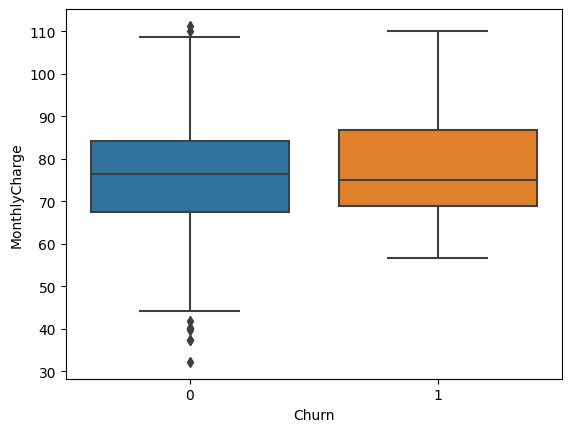

In [40]:
sns.boxplot(x="Churn", y="MonthlyCharge", data=seg2)

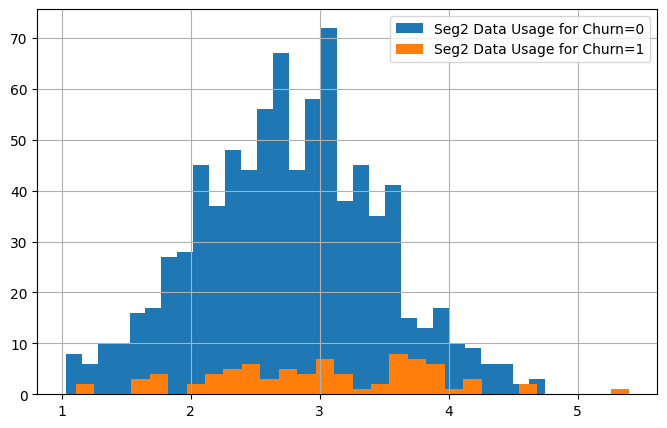

In [41]:
plt.figure(figsize=(8,5))
seg20["DataUsage"].hist(bins=30, label='Seg2 Data Usage for Churn=0')
seg21["DataUsage"].hist(bins=30, label='Seg2 Data Usage for Churn=1') 
plt.legend()

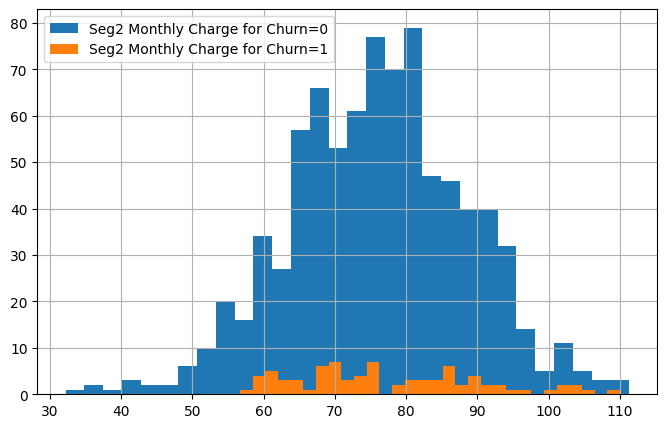

In [42]:
plt.figure(figsize=(8,5))
seg20["MonthlyCharge"].hist(bins=30, label='Seg2 Monthly Charge for Churn=0') 
seg21["MonthlyCharge"].hist(bins=30, label='Seg2 Monthly Charge for Churn=1') 
plt.legend()

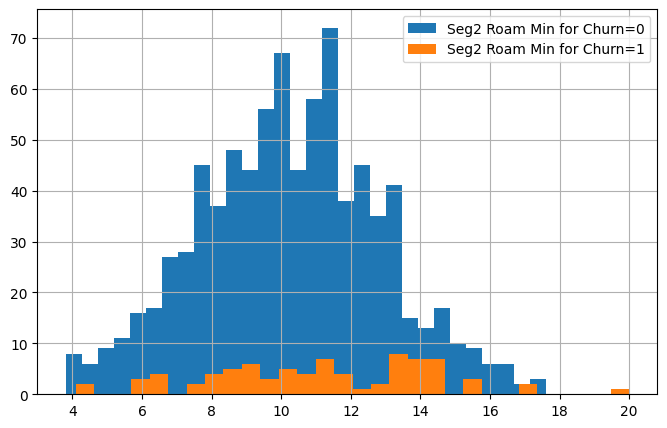

In [43]:
plt.figure(figsize=(8,5))
seg20["RoamMins"].hist(bins=30, label='Seg2 Roam Min for Churn=0') 
seg21["RoamMins"].hist(bins=30, label='Seg2 Roam Min for Churn=1')
plt.legend() 

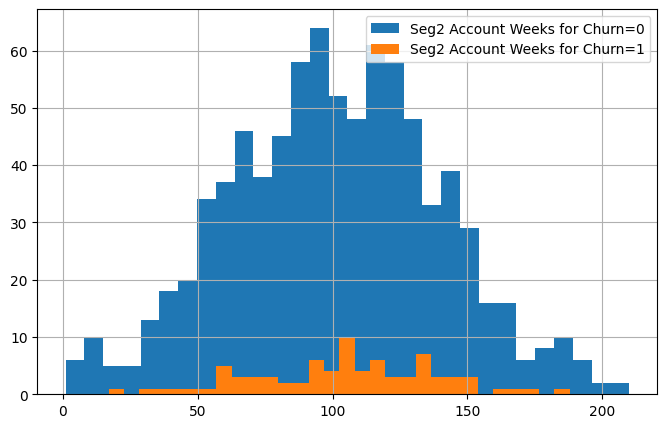

In [44]:
plt.figure(figsize=(8,5))
seg20["AccountWeeks"].hist(bins=30, label='Seg2 Account Weeks for Churn=0') 
seg21["AccountWeeks"].hist(bins=30, label='Seg2 Account Weeks for Churn=1')
plt.legend() 

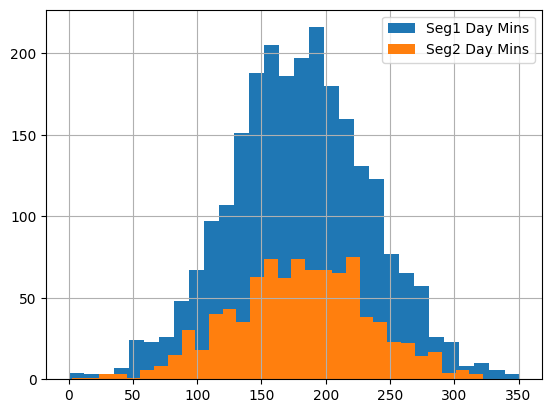

In [45]:
seg1['DayMins'].hist(bins=30, label='Seg1 Day Mins')
seg2['DayMins'].hist(bins=30, label='Seg2 Day Mins')
plt.legend()

In [46]:
seg1['DayMins'].mean()

179.7163223140496

In [47]:
seg2['DayMins'].mean()

179.93088718510404

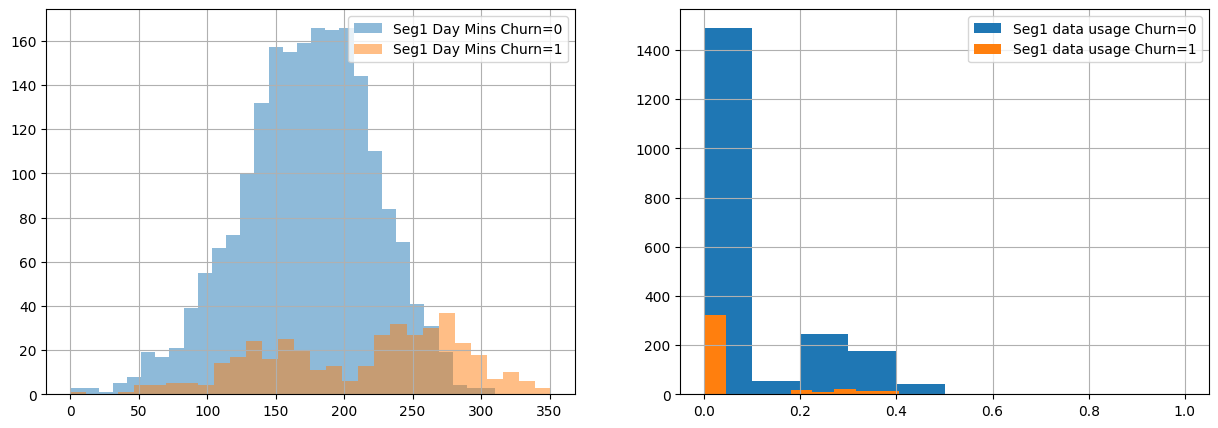

In [48]:
plt.figure(figsize=(15,5))

plt.subplot(121)
seg10["DayMins"].hist(bins=30, alpha=0.5, label='Seg1 Day Mins Churn=0')
seg11["DayMins"].hist(bins=30, alpha=0.5, label='Seg1 Day Mins Churn=1')
plt.legend()

plt.subplot(122)
seg10["DataUsage"].hist(label='Seg1 data usage Churn=0')
seg11["DataUsage"].hist(label='Seg1 data usage Churn=1')
plt.legend()

<Axes: xlabel='DataUsage', ylabel='Churn'>

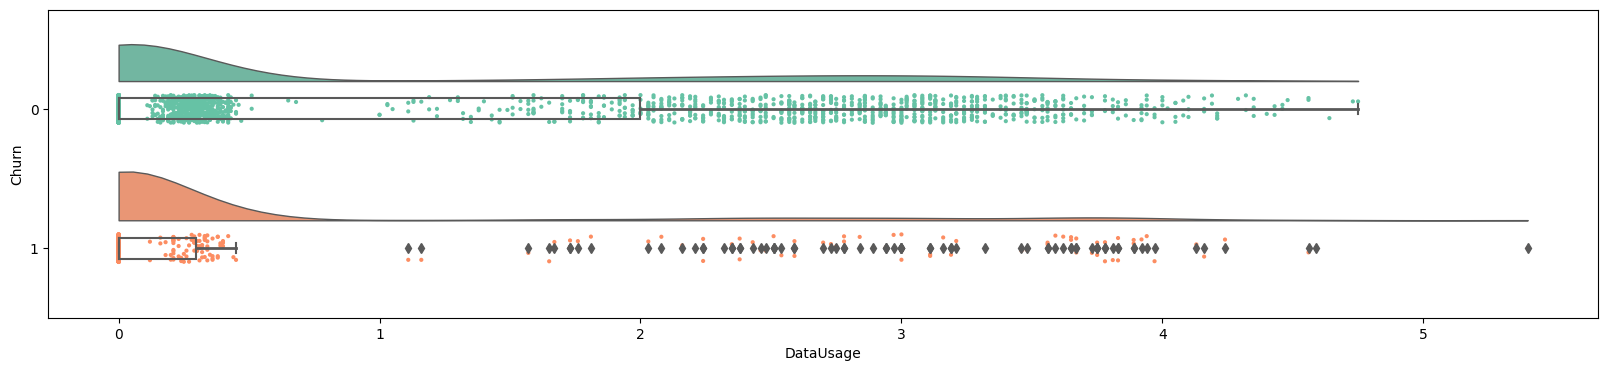

In [49]:
plt.figure(figsize=(20,4))
ptitprince.RainCloud(data = df, x = 'Churn', y = 'DataUsage', orient = 'h')

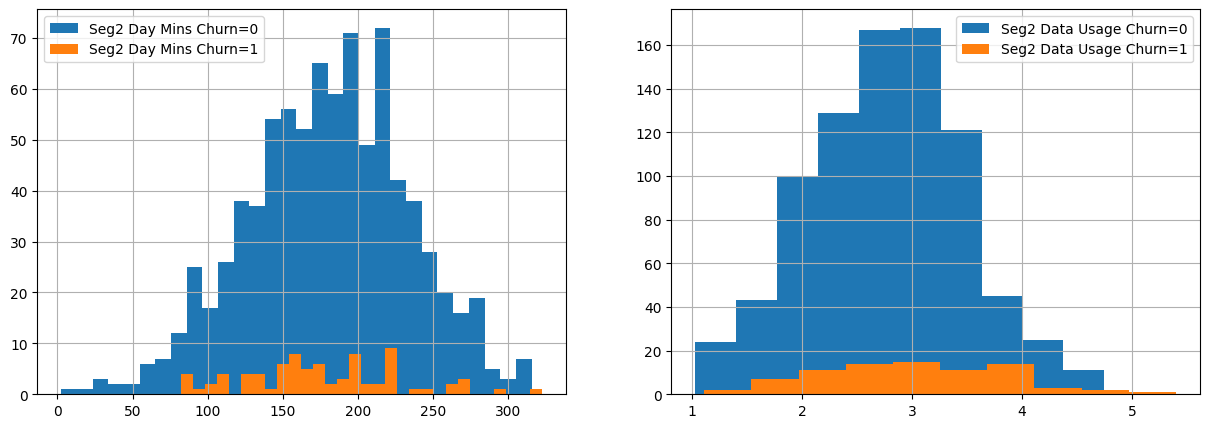

In [50]:
plt.figure(figsize=(15,5))

plt.subplot(121)
seg20["DayMins"].hist(bins=30, label='Seg2 Day Mins Churn=0')
seg21["DayMins"].hist(bins=30, label='Seg2 Day Mins Churn=1')
plt.legend()

plt.subplot(122)
seg20["DataUsage"].hist(label='Seg2 Data Usage Churn=0')
seg21["DataUsage"].hist(label='Seg2 Data Usage Churn=1')
plt.legend()

<Axes: title={'center': 'Segment 2 Monthly charges'}>

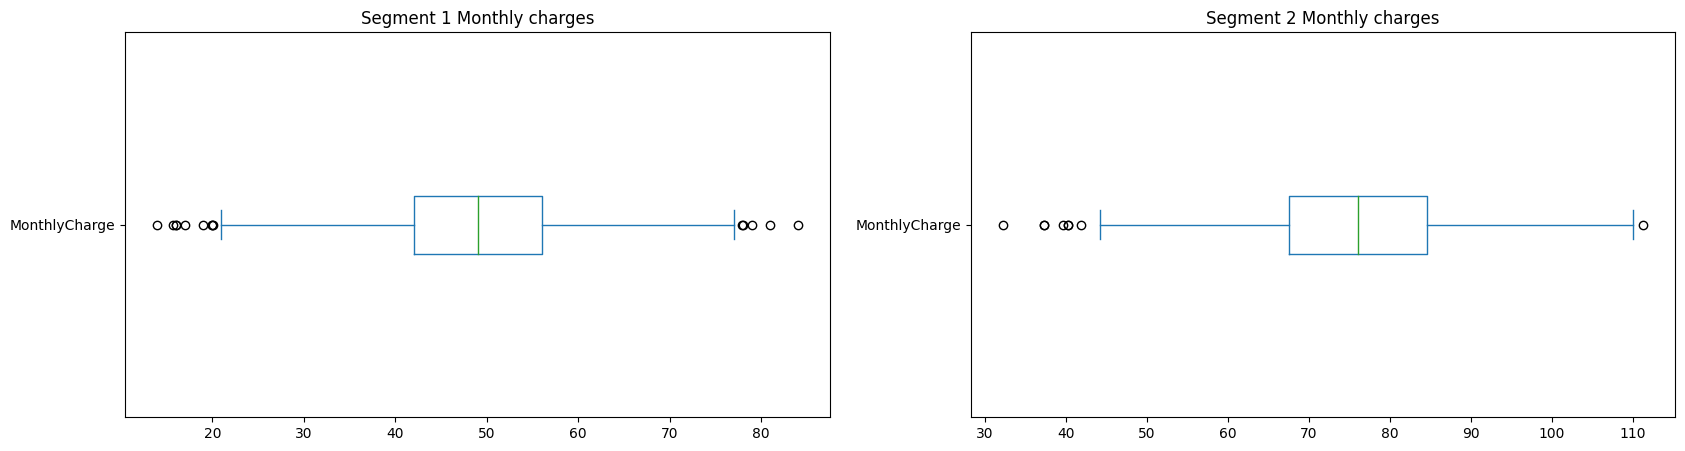

In [51]:
plt.figure(figsize=(20,5))
plt.subplot(121)
seg1["MonthlyCharge"].plot(kind="box", vert=False, title="Segment 1 Monthly charges")
plt.subplot(122)
seg2["MonthlyCharge"].plot(kind="box", vert=False, title="Segment 2 Monthly charges")

<Axes: xlabel='Churn', ylabel='MonthlyCharge'>

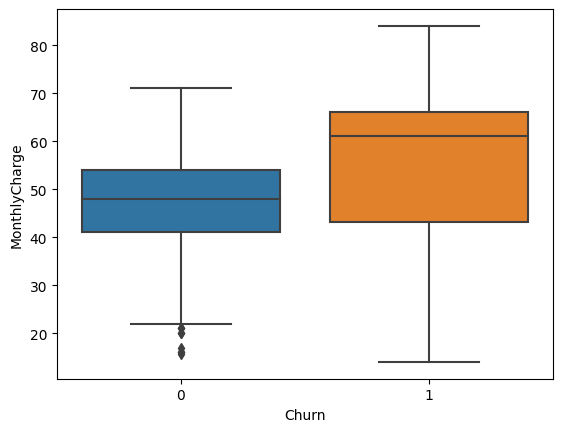

In [52]:
sns.boxplot(x="Churn", y="MonthlyCharge", data=seg1)

<Axes: xlabel='Churn', ylabel='MonthlyCharge'>

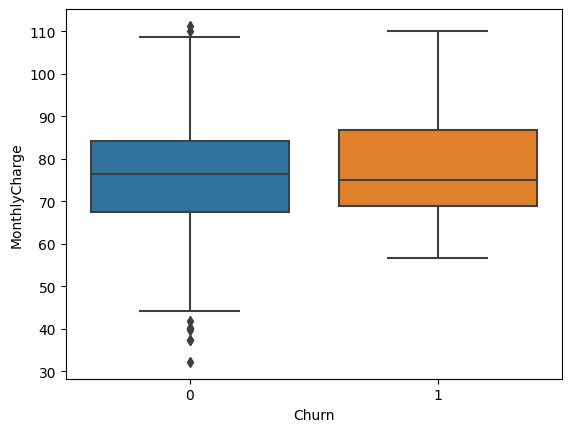

In [53]:
sns.boxplot(x="Churn", y="MonthlyCharge", data=seg2)

Sum of Monthly Charge in seg1 = 118104.1
Sum of Monthly Charge in seg2 = 69561.0


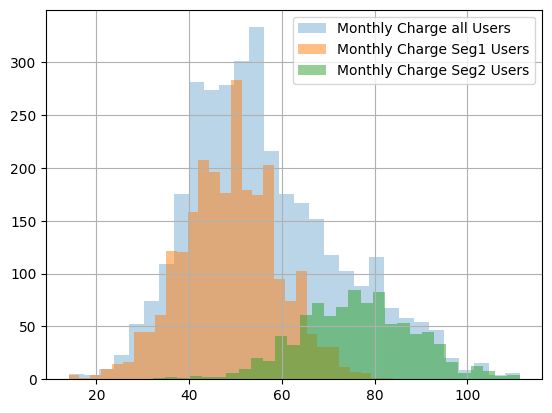

In [54]:
df["MonthlyCharge"].hist(bins=30, alpha=0.3, label='Monthly Charge all Users') 
seg1["MonthlyCharge"].hist(bins=30, alpha=0.5, label='Monthly Charge Seg1 Users') 
seg2["MonthlyCharge"].hist(bins=30, alpha=0.5,label='Monthly Charge Seg2 Users') 
plt.legend()

print("Sum of Monthly Charge in seg1 =", seg1["MonthlyCharge"].sum())
print("Sum of Monthly Charge in seg2 =", seg2["MonthlyCharge"].sum())

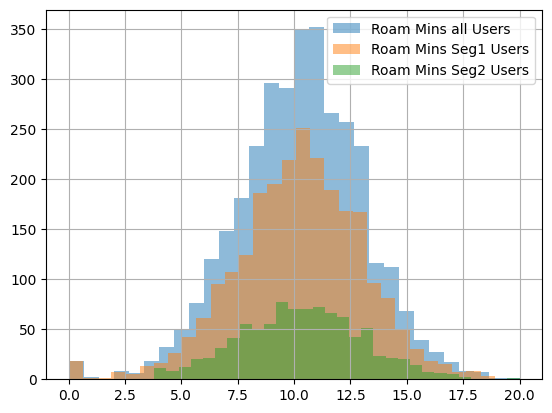

In [55]:
df["RoamMins"].hist(bins=30, alpha=0.5, label='Roam Mins all Users')
seg1["RoamMins"].hist(bins=30, alpha=0.5, label='Roam Mins Seg1 Users')
seg2["RoamMins"].hist(bins=30, alpha=0.5, label='Roam Mins Seg2 Users')
plt.legend()

20426.3 mins, per 2017 customers who not churned.
4276.5 mins, per 403 customers who churned.


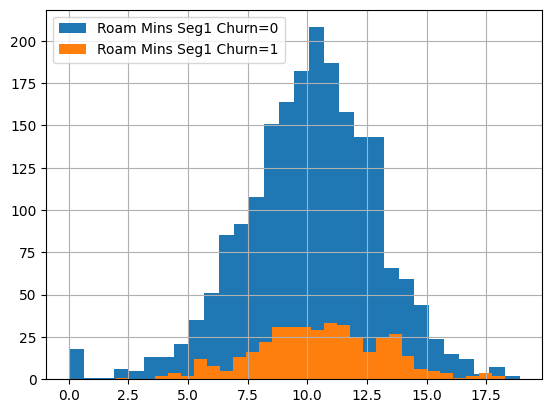

In [56]:
seg10["RoamMins"].hist(bins=30, label='Roam Mins Seg1 Churn=0')
seg11["RoamMins"].hist(bins=30, label='Roam Mins Seg1 Churn=1') 
plt.legend()

print(f"{seg10.RoamMins.sum()} mins, per {len(seg10.RoamMins)} customers who not churned.")
print(f"{seg11.RoamMins.sum()} mins, per {len(seg11.RoamMins)} customers who churned.")

8526.5 mins, per 833 customers who not churned.
891.6000000000001 mins, per 80 customers who churned.


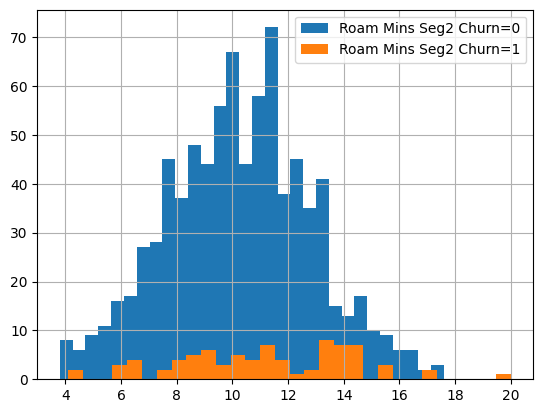

In [57]:
seg20["RoamMins"].hist(bins=30, label='Roam Mins Seg2 Churn=0')
seg21["RoamMins"].hist(bins=30, label='Roam Mins Seg2 Churn=1')
plt.legend()

print(f"{seg20.RoamMins.sum()} mins, per {len(seg20.RoamMins)} customers who not churned.")
print(f"{seg21.RoamMins.sum()} mins, per {len(seg21.RoamMins)} customers who churned.")

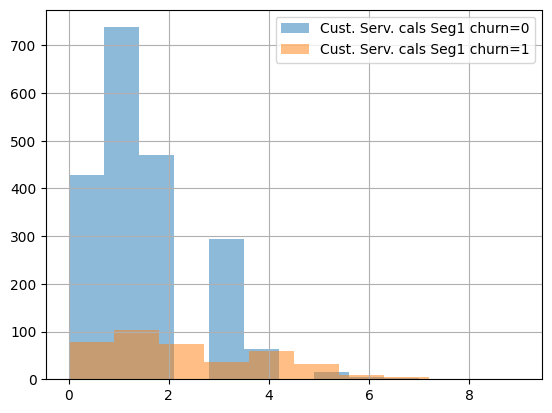

In [58]:
seg10["CustServCalls"].hist(alpha=0.5, label='Cust. Serv. cals Seg1 churn=0')
seg11["CustServCalls"].hist(alpha=0.5, label='Cust. Serv. cals Seg1 churn=1')
plt.legend()

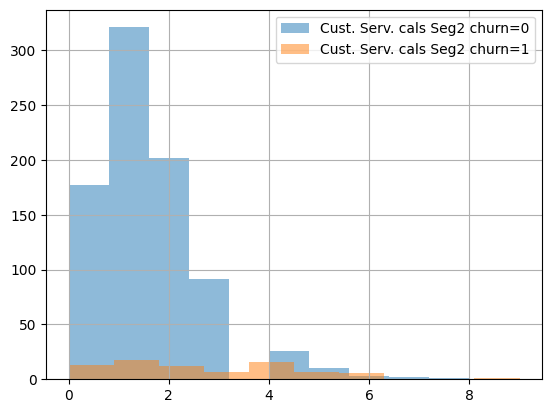

In [59]:
seg20["CustServCalls"].hist(alpha=0.5, label='Cust. Serv. cals Seg2 churn=0')
seg21["CustServCalls"].hist(alpha=0.5, label='Cust. Serv. cals Seg2 churn=1')
plt.legend()

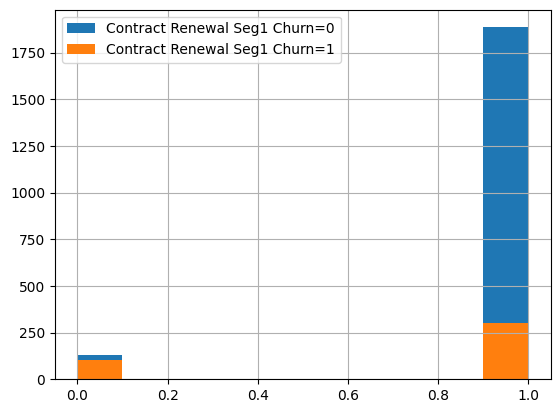

In [60]:
seg10["ContractRenewal"].hist(label='Contract Renewal Seg1 Churn=0') 
seg11["ContractRenewal"].hist(label='Contract Renewal Seg1 Churn=1')
plt.legend() 

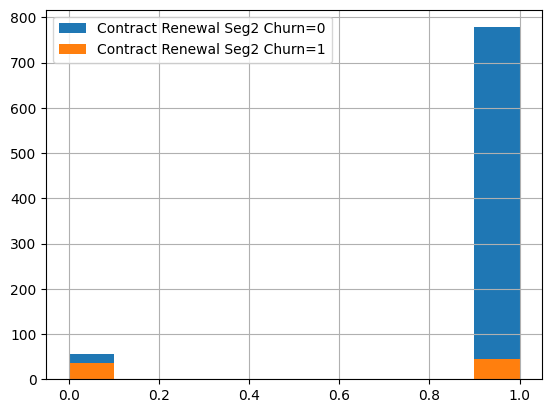

In [61]:
seg20["ContractRenewal"].hist(label='Contract Renewal Seg2 Churn=0')
seg21["ContractRenewal"].hist(label='Contract Renewal Seg2 Churn=1')
plt.legend()

In [62]:
population_churn = []   # Remaining customers (not in Group2) churn % in sample (Group 1)
no_data_plan_churn = []   # Churn % in data users, without data plan (Group 2)

for i in range(0,1000):
  sample = df.sample(n=20)
  sample_churn = sample.loc[~(sample['DataPlan']==0)&(sample['DataUsage']>0)]['Churn'].value_counts(normalize=True)
  sample_churn_data_plan = sample.loc[(sample['DataPlan']==0)&(sample['DataUsage']>0)]['Churn'].value_counts(normalize=True)
  population_churn.append(sample_churn)
  no_data_plan_churn.append(sample_churn_data_plan)

In [63]:
population_churn = pd.DataFrame(population_churn)
no_data_plan_churn = pd.DataFrame(no_data_plan_churn)

In [64]:
population_churn[1].mean()

0.22144541865354048

In [65]:
no_data_plan_churn[1].mean()

0.3311781703913683

In [66]:
permutation_results = pd.concat([population_churn, no_data_plan_churn], axis=1, ignore_index=True)
permutation_results.reset_index(drop=True, inplace=True)

In [67]:
dff = permutation_results
dff.fillna(0, inplace=True)
dff['Result'] = dff[3] - dff[1]
dff

0     1         2         3    Result
0    1.00  0.00  0.500000  0.500000  0.500000
1    1.00  0.00  1.000000  0.000000  0.000000
2    1.00  0.00  1.000000  0.000000  0.000000
3    1.00  0.00  1.000000  0.000000  0.000000
4    0.60  0.40  1.000000  0.000000 -0.400000
..    ...   ...       ...       ...       ...
995  0.90  0.10  1.000000  0.000000 -0.100000
996  0.75  0.25  0.666667  0.333333  0.083333
997  1.00  0.00  1.000000  0.000000  0.000000
998  0.75  0.25  0.666667  0.333333  0.083333
999  0.50  0.50  1.000000  0.000000 -0.500000

[1000 rows x 5 columns]

In [68]:
len(dff.loc[dff['Result']>=0]) * 100 / len(dff)

70.7

In [69]:
len(dff.loc[dff['Result']<0]) * 100 / len(dff)

29.3

In [70]:
df['Churn'].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [71]:
# Random under-sampleing
df2 = df.loc[df['Churn']==0].sample(n=483).copy()
# All Churned Customers
df3 = df.loc[df['Churn']==1].copy()

# Concat all customers, with new index on raws
df4 = pd.concat([df2,df3], ignore_index=True)

# Shuffle raws randomly
df4 = df4.sample(frac=1)

# Reset index of every raws
df4.reset_index(drop=True, inplace=True)
df4

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
0        1            65                1         0       0.29              4   
1        1            92                0         0       0.00              1   
2        0           104                1         0       0.34              3   
3        1           103                1         1       3.75              4   
4        1           100                1         0       0.32              0   
..     ...           ...              ...       ...        ...            ...   
961      1           126                1         0       0.00              5   
962      0            48                1         0       0.00              3   
963      1           119                1         0       0.00              5   
964      0           101                1         1       2.73              0   
965      1           131                0         1       3.73              4   

     DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0      129.1       137           44.9       11.43      12.7  
1       62.6       111           26.0        9.03      10.4  
2      109.1       141           38.4        9.36      10.0  
3      110.5       101           74.5       10.42      13.9  
4      278.0        76           66.2        8.84       8.3  
..       ...       ...            ...         ...       ...  
961     58.2        94           22.0        6.94      11.9  
962    149.2       146           40.0        8.10       8.3  
963    159.1       114           47.0       11.57       8.8  
964    121.1       116           64.3        9.32      10.1  
965    292.9       101          104.3        9.99      13.8  

[966 rows x 11 columns]

<Axes: >

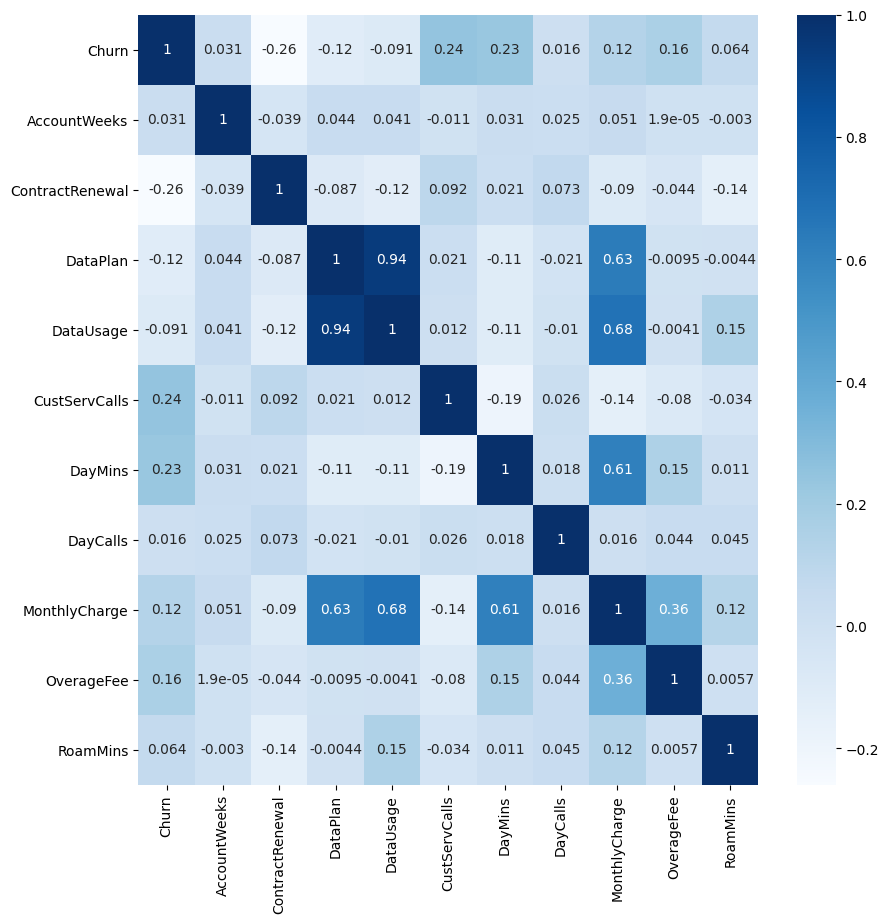

In [72]:
plt.figure(figsize=(10,10))
sns.heatmap(df4.corr(), annot=True, cmap='Blues')

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:991: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:991: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:991: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:991: FutureWarning: When 

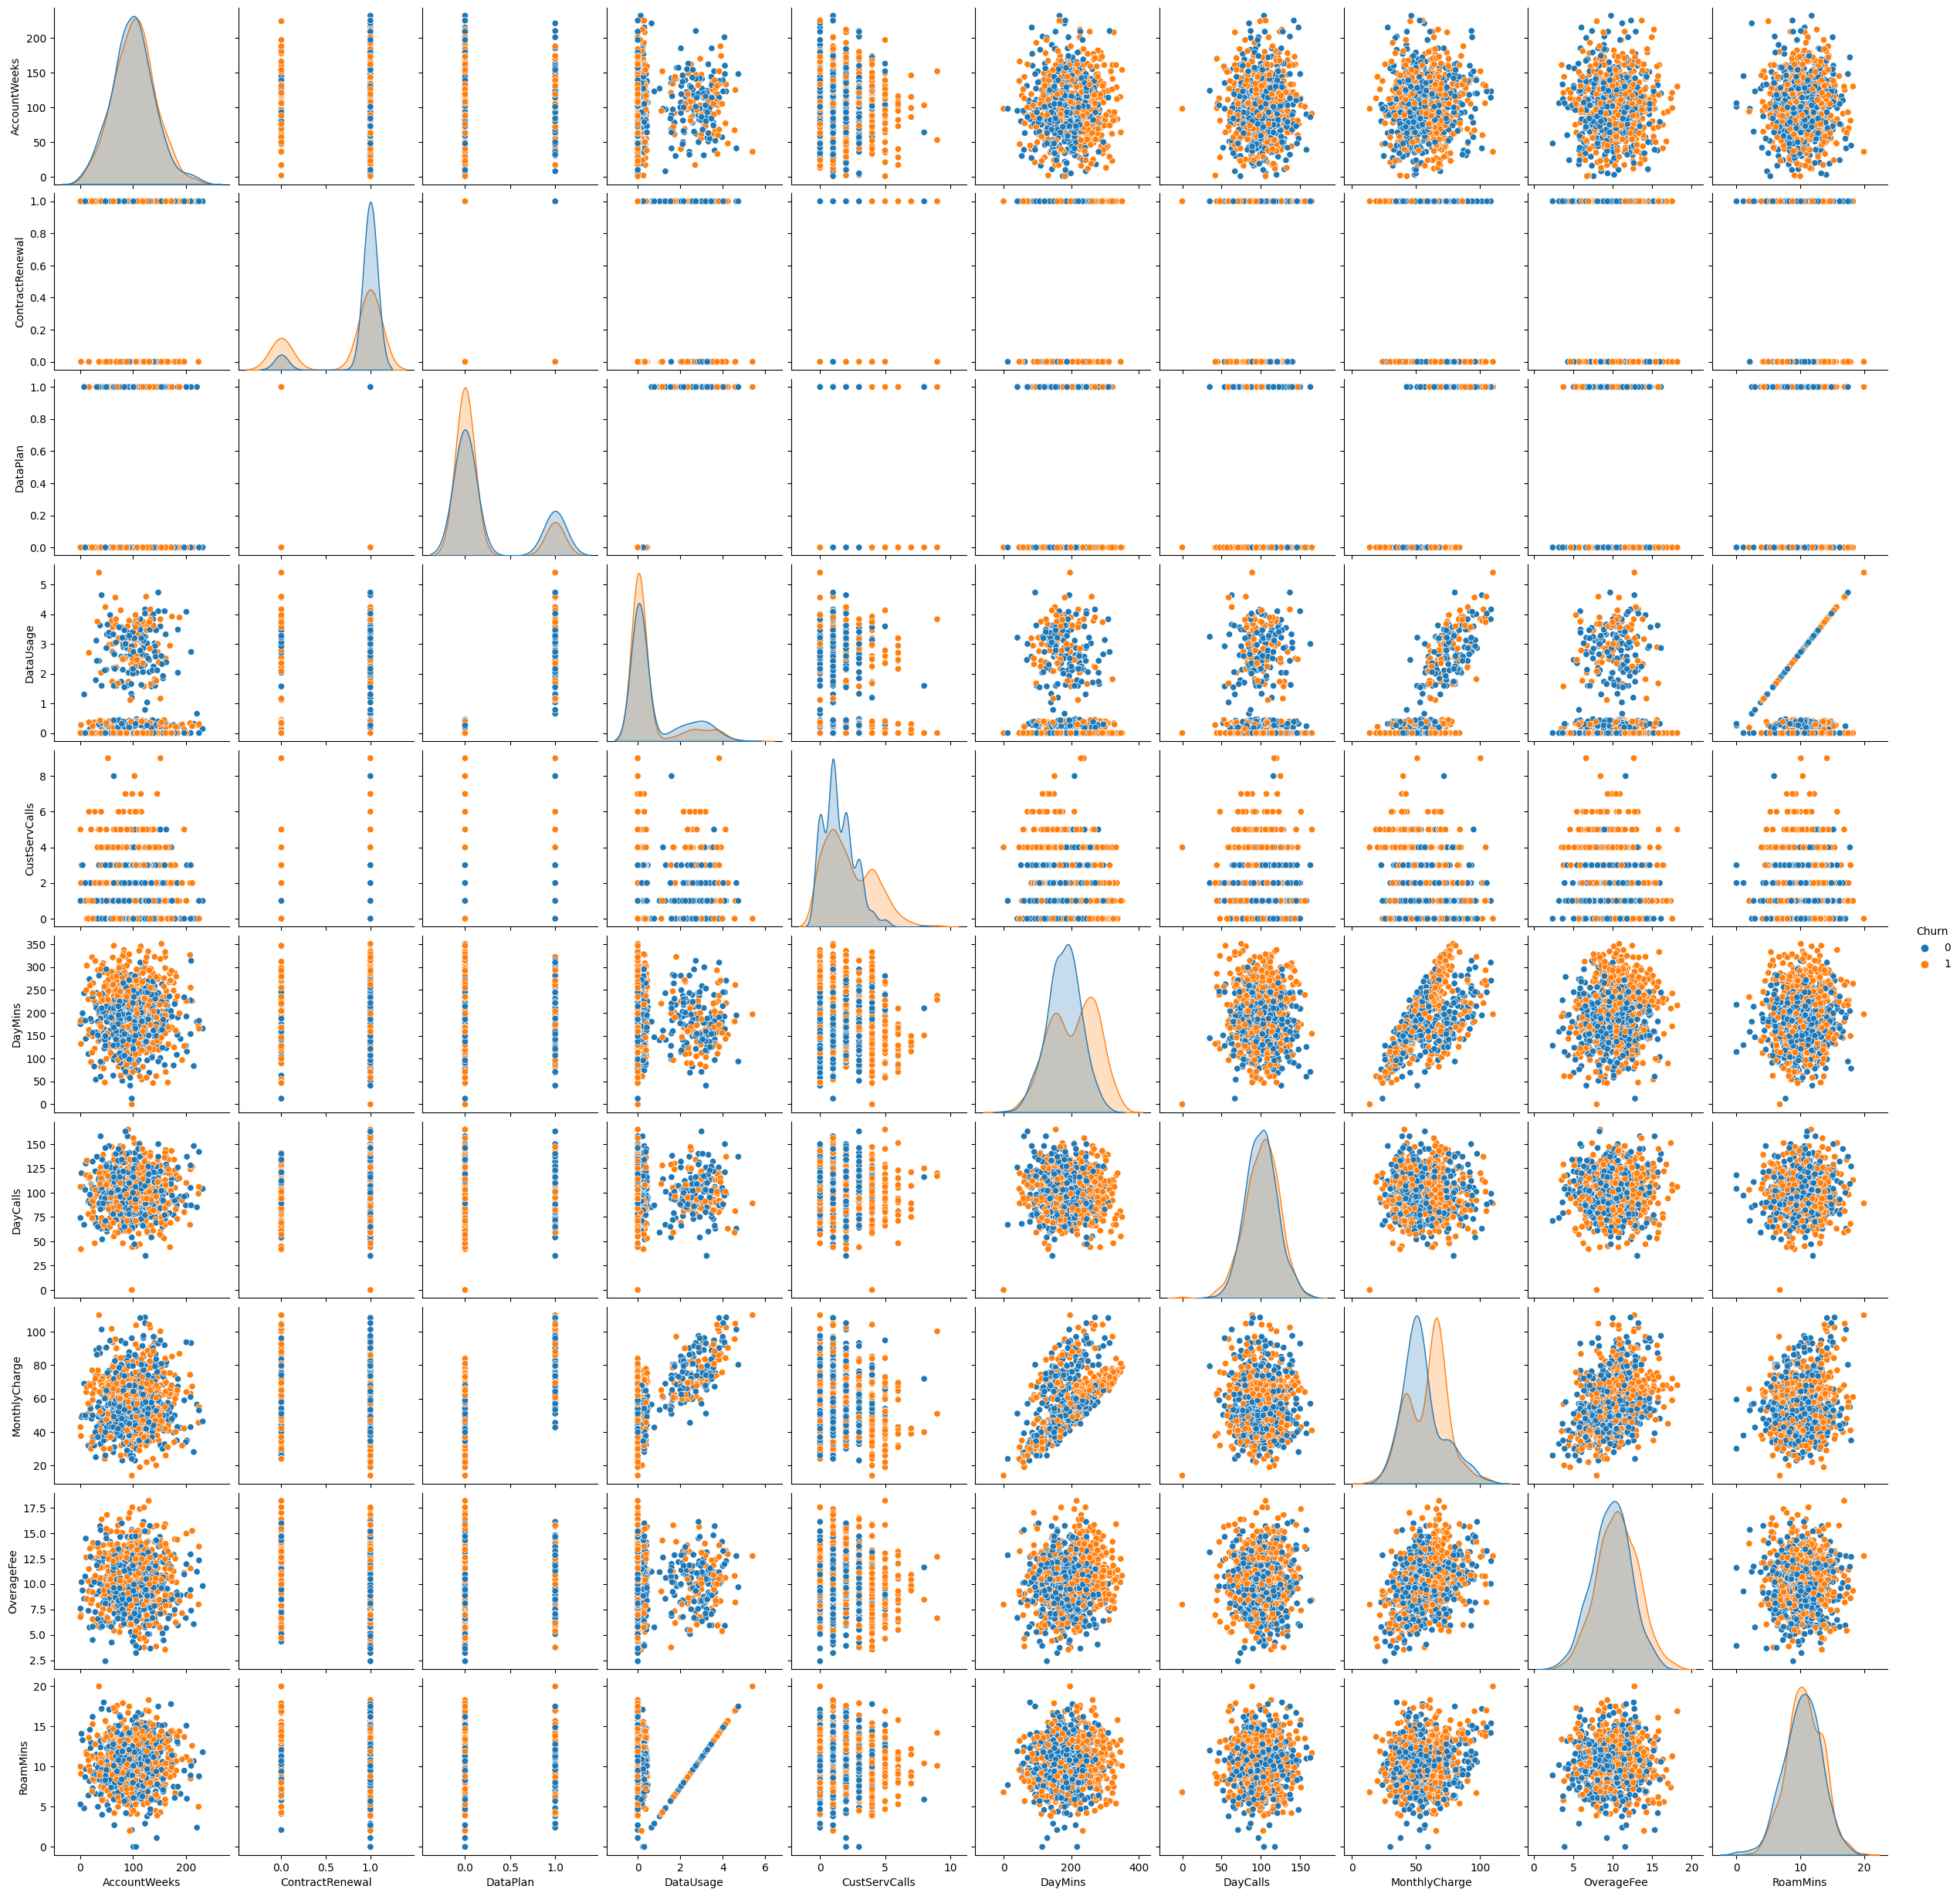

In [73]:
sns.pairplot(df4, hue='Churn')

<Axes: xlabel='DataUsage', ylabel='Churn'>

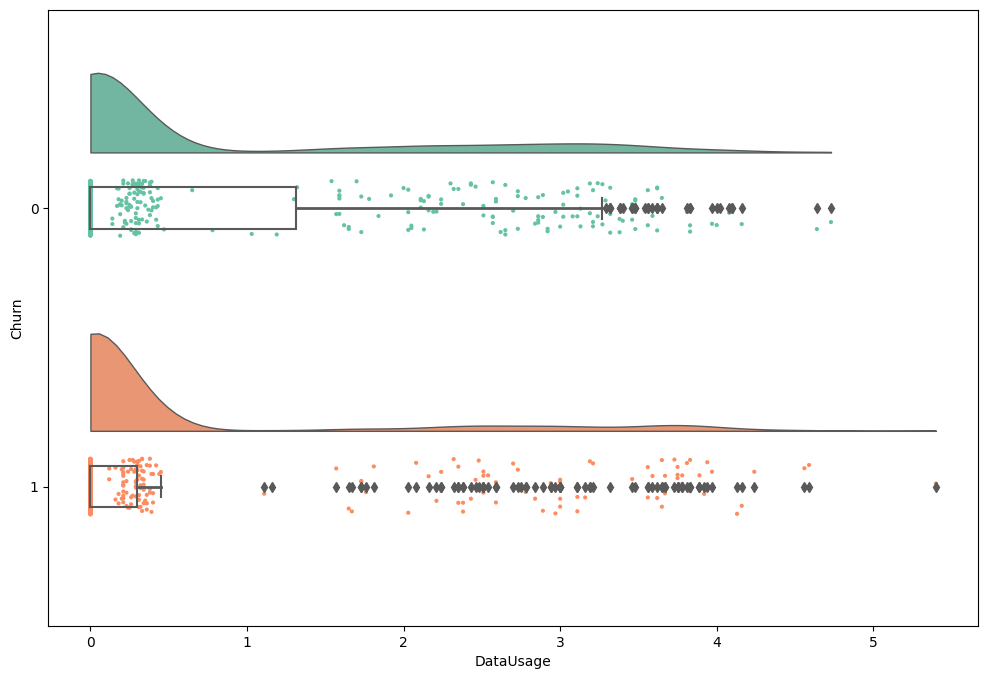

In [74]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df4, x = 'Churn', y = 'DataUsage', orient = 'h')

<Axes: xlabel='DayMins', ylabel='Churn'>

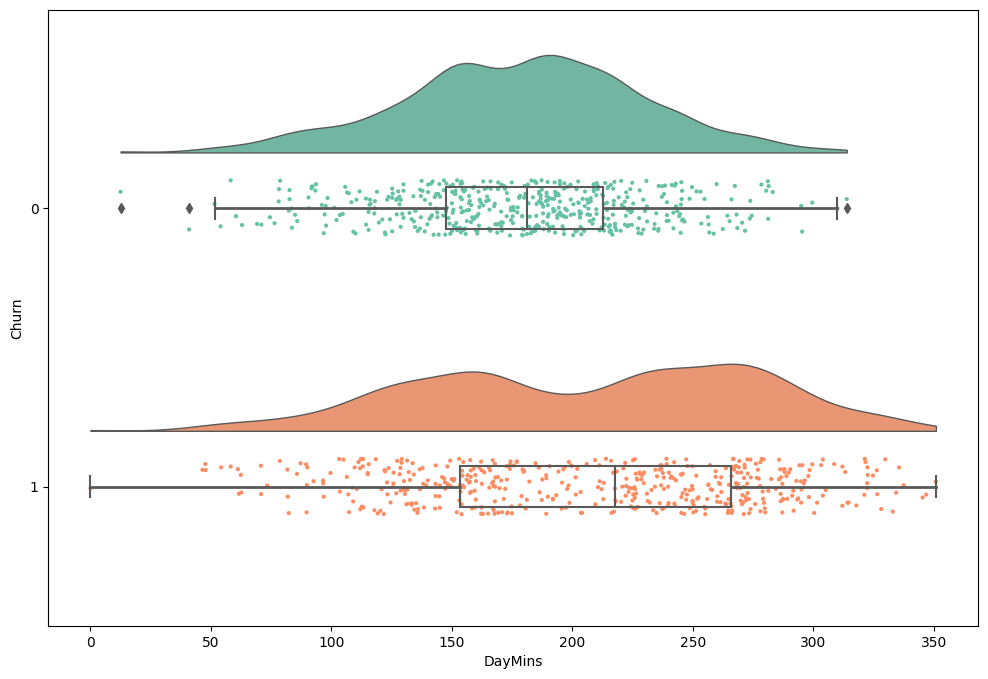

In [75]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df4, x = 'Churn', y = 'DayMins', orient = 'h')

<Axes: xlabel='MonthlyCharge', ylabel='Churn'>

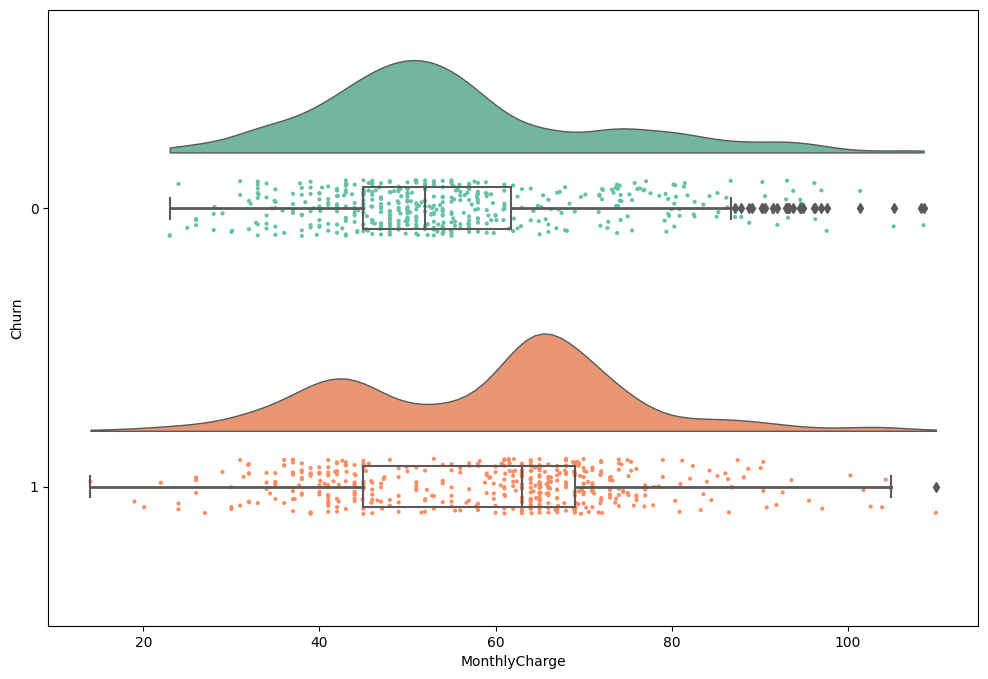

In [76]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df4, x = 'Churn', y = 'MonthlyCharge', orient = 'h')

In [77]:
X = df4.drop("Churn", axis=1)
y = df4["Churn"]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [80]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


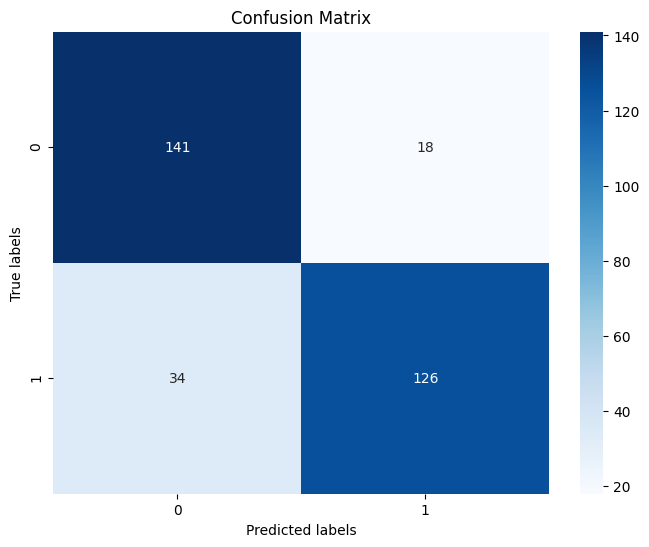

              precision    recall  f1-score   support

           0       0.81      0.89      0.84       159
           1       0.88      0.79      0.83       160

    accuracy                           0.84       319
   macro avg       0.84      0.84      0.84       319
weighted avg       0.84      0.84      0.84       319



In [82]:
clfd = DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_split=10)
clfd.fit(X_train, y_train)

# Predict
pd = clfd.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, pd)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, pd))

Random Forest:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       159
           1       0.84      0.85      0.85       160

    accuracy                           0.85       319
   macro avg       0.85      0.85      0.85       319
weighted avg       0.85      0.85      0.85       319



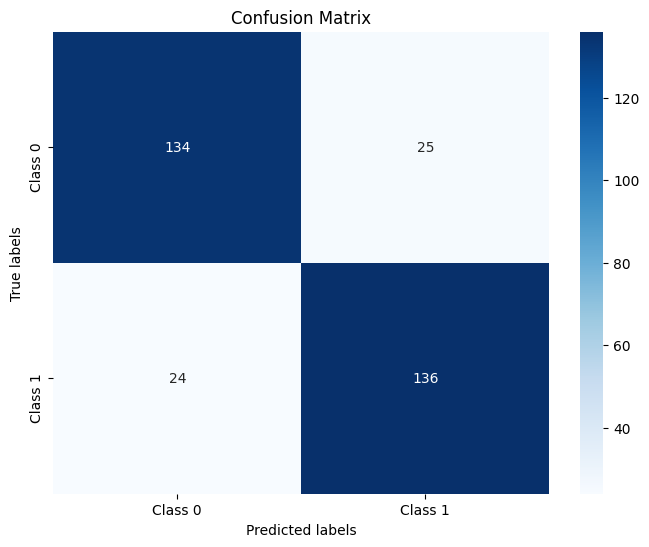

Gradient Boosting:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       159
           1       0.84      0.83      0.84       160

    accuracy                           0.84       319
   macro avg       0.84      0.84      0.84       319
weighted avg       0.84      0.84      0.84       319



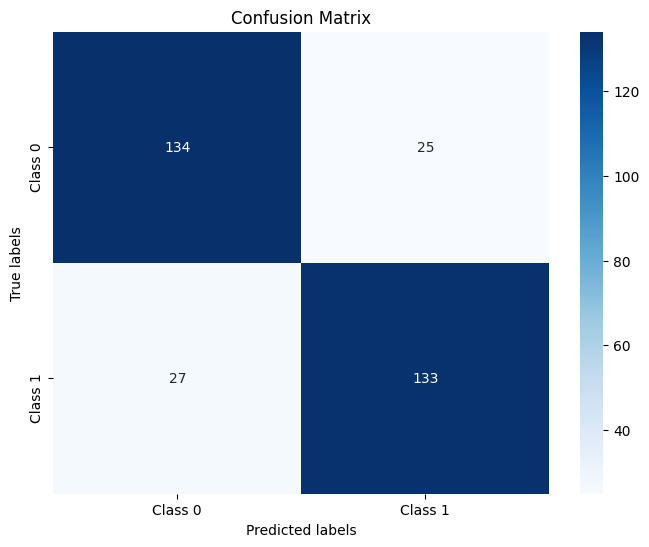

K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       159
           1       0.81      0.78      0.80       160

    accuracy                           0.80       319
   macro avg       0.80      0.80      0.80       319
weighted avg       0.80      0.80      0.80       319



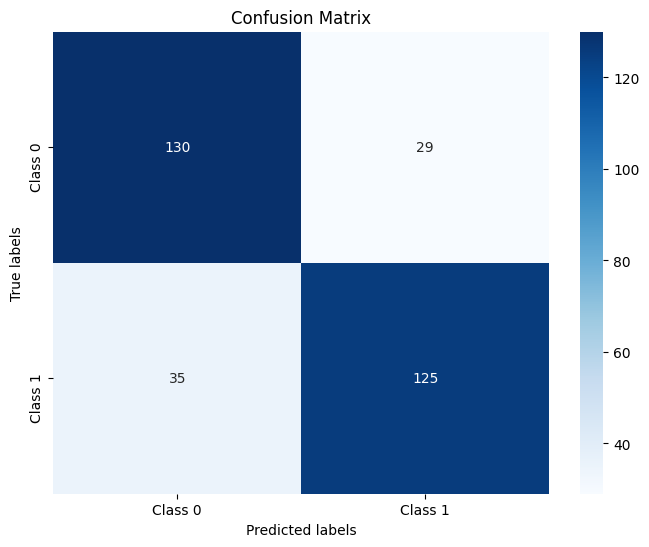

In [83]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Random Forest
clfr = RandomForestClassifier(n_estimators=100, random_state=0)
clfr.fit(X_train, y_train)
pr = clfr.predict(X_test)
cm_rf = confusion_matrix(y_test, pr)
print("Random Forest:")
print(classification_report(y_test, pr))
plot_confusion_matrix(cm_rf, labels=['Class 0', 'Class 1'])

# Gradient Boosting
clfg = GradientBoostingClassifier(n_estimators=200, max_depth=2, random_state=0)
clfg.fit(X_train, y_train)
pg = clfg.predict(X_test)
cm_gb = confusion_matrix(y_test, pg)
print("Gradient Boosting:")
print(classification_report(y_test, pg))
plot_confusion_matrix(cm_gb, labels=['Class 0', 'Class 1'])

# K-Nearest Neighbors
clfk = KNeighborsClassifier(n_neighbors=5, weights='distance')
clfk.fit(X_train, y_train)
pk = clfk.predict(X_test)
cm_knn = confusion_matrix(y_test, pk)
print("K-Nearest Neighbors:")
print(classification_report(y_test, pk))
plot_confusion_matrix(cm_knn, labels=['Class 0', 'Class 1'])


In [84]:
p1 = clfd.predict_proba(X_test)
p2 = clfr.predict_proba(X_test)
p3 = clfg.predict_proba(X_test)
p4 = clfk.predict_proba(X_test)

In [85]:
# auc scores
auc_score1 = roc_auc_score(y_test, p1[:,1])
auc_score2 = roc_auc_score(y_test, p2[:,1])
auc_score3 = roc_auc_score(y_test, p3[:,1])
auc_score4 = roc_auc_score(y_test, p4[:,1])

print(auc_score1, auc_score2, auc_score3, auc_score4)

0.8773388364779875 0.8933765723270439 0.8981525157232704 0.8600432389937107


In [86]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, p1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, p2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, p3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, p4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

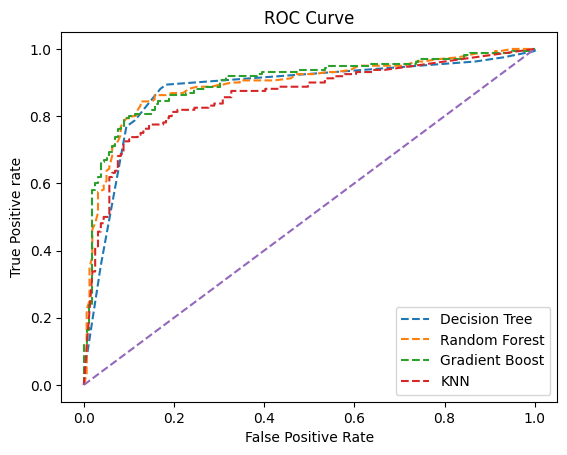

In [87]:
plt.plot(fpr1, tpr1, linestyle='--', label='Decision Tree')
plt.plot(fpr2, tpr2, linestyle='--', label='Random Forest')
plt.plot(fpr3, tpr3, linestyle='--', label='Gradient Boost')
plt.plot(fpr4, tpr4, linestyle='--', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')